In [2]:
import numpy as np 
import pandas as pd 


import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import warnings
warnings.filterwarnings('ignore')
import pickle
from _1_load_data import Load_Data
from _2_visuals import Graphs
from _2_chart_functions import Chart_Functions

'''
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:,.5f}'.format)
'''


pd.set_option('display.float_format', '{:,.2f}'.format)

d:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
d:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
#Setup
dl=Load_Data()
cf=Chart_Functions()
g=Graphs()

df_og=dl.pp_raw_hotel_data()


# __Intro

## Timeseries

In [3]:
df_og.from_country.value_counts(normalize=True)

Philippines                0.45
United States of America   0.08
United Kingdom             0.05
Australia                  0.04
Saudi Arabia               0.04
                           ... 
Norfolk Island             0.00
Mauritania                 0.00
St. Maarten                0.00
Cook Islands               0.00
Rwanda                     0.00
Name: from_country, Length: 193, dtype: float64

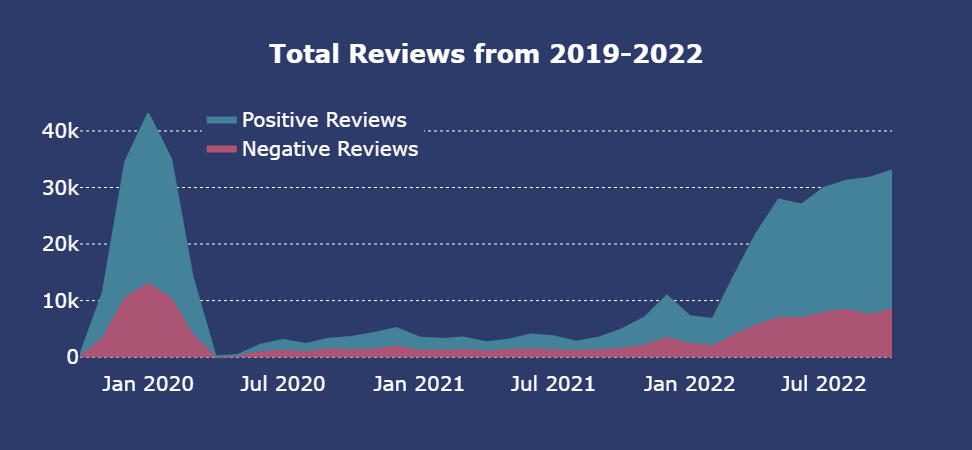

In [4]:
#fig=g.plot_reviews_timeseries_v2(line_color1="white",line_color2="pink",height=450,width=500)
fig=g.plot_reviews_timeseries_v2(line_color1="#448299",line_color2="#AB5474",height=450,width=500)
cf.update_layout_legend(fig, 0.15,1)
fig.show()


# __Barchart-Local vs Foreign

## Function Plotly

In [4]:
mapping_dict={1:"Good Review",0: "Bad Review"}
countries_to_include = ["Philippines"]



list_for_data=cf.categorical_eda_plots_plotly(df_og,"from_country",
                                    target_mapping=mapping_dict,
                                    column_mapping_list=countries_to_include,others_name="Foreign",
                                    hue="good_review", 
                                    time_series=False,  
                                    #ax=ax1,
                                     )


data1,data2,data3,order,order_green, order_red=list_for_data

In [5]:
fig = make_subplots(rows=1, cols=1,
                    #vertical_spacing = 0.04,
subplot_titles=("",""))


#x=data1.rename(index={"Philippines":'Local'}).index
fig.add_trace(go.Bar(x=data3.rename(index={"Philippines":'Local'}).index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.8, marker_color="white",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data1.rename(index={"Philippines":'Local'}).index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.9, marker_color="#448299"),row=1, col=1)
fig.add_trace(go.Bar(x=data2.rename(index={"Philippines":'Local'}).index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.9, marker_color="#AB5474"),row=1, col=1)


#cf.layout_v1(fig,"Local vs Foreign<br>Comparing Proportions (%)",400,400,order)
#g.annotate_subplot_text(fig,'Foreign',65,"55%",0,0,"x1","y1",bgcolor="grey",)
#g.annotate_subplot_text(fig,'Philippines',50.5,"45%",0,0,"x1","y1",bgcolor="grey",)

new_order=[i.replace('Philippines', 'Local') for i in order]
cf.update_layout(fig,"Comparing Proportions <br>Local Vs Foreign",450,500,bgcolor="#2D3B6A",font_color="white",show_ygrid=False)
cf.update_layout_order(fig,new_order)
cf.update_layout_legend(fig,0.25,-0.15,orientation="h")

fig.show()

test


# Subplots for Streamlit

In [105]:
mapping_dict={1:"Good Review",0: "Bad Review"}
countries_to_include = ["Philippines"]



list_for_data=cf.categorical_eda_plots_plotly(df_og,"from_country",
                                    target_mapping=mapping_dict,
                                    column_mapping_list=countries_to_include,others_name="Foreign",
                                    hue="good_review", 
                                    time_series=False,  
                                    #ax=ax1,
                                     )


data1,data2,data3,order,order_green, order_red=list_for_data

In [106]:
fig = make_subplots(rows=2, cols=2,
                    vertical_spacing = 0.3,
                specs=[[{"colspan": 2}, None],
           [{}, {}],],
subplot_titles=("","Traveler Type","Nights Stayed"))


#x=data1.rename(index={"Philippines":'Local'}).index
fig.add_trace(go.Bar(x=data3.rename(index={"Philippines":'Local'}).index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.8, marker_color="white",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data1.rename(index={"Philippines":'Local'}).index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.9, marker_color="#448299",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data2.rename(index={"Philippines":'Local'}).index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.9, marker_color="#AB5474",showlegend=False,),row=1, col=1)


fig.show()


In [107]:

# Stacked Histplot (Compare Proportions)
mapping_dict={1:"Good Review",0: "Bad Review"}
countries_to_include = ["Philippines"]



list_for_data=cf.categorical_eda_plots_plotly(df_og,"occupant_type",
                                    target_mapping=mapping_dict,
                                    #column_mapping_list=countries_to_include,
                                    hue="good_review", 
                                    time_series=False,  
                                        )

data1,data2,data3,order,order_green, order_red=list_for_data

In [108]:
df_ns=df_og.copy()
df_ns["nights_stayed"]=df_ns["nights_stayed_"].apply(lambda x: str(x))

mapping_dict={1:"Good Review",0: "Bad Review"}
values_to_include = ["1","2","3"]



list_for_data=cf.categorical_eda_plots_plotly(df_ns,"nights_stayed",
                                    target_mapping=mapping_dict,
                                    column_mapping_list=values_to_include,others_name="4+",
                                    hue="good_review", 
                                    time_series=False,  
                                    )

data1_,data2_,data3_,order_,order_green_, order_red_=list_for_data


In [109]:


fig.add_trace(go.Bar(x=data3.rename(index={"Solo traveler": "Solo"}).index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.8, marker_color="white",showlegend=False,),row=2, col=1)
fig.add_trace(go.Bar(x=data1.rename(index={"Solo traveler": "Solo"}).index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.9, marker_color="#448299",showlegend=True,),row=2, col=1)
fig.add_trace(go.Bar(x=data2.rename(index={"Solo traveler": "Solo"}).index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.9, marker_color="#AB5475",showlegend=True,),row=2, col=1)


fig.add_trace(go.Bar(x=data3_.index, y=data3_[data3_.columns[0]].values.tolist(),name="", opacity=0.8, marker_color="white",showlegend=False,),row=2, col=2)
fig.add_trace(go.Bar(x=data1_.index, y=data1_[data1_.columns[0]].values.tolist(),name="Good", opacity=0.9, marker_color="#448299",showlegend=False,),row=2, col=2)
fig.add_trace(go.Bar(x=data2_.index, y=data2_[data2_.columns[0]].values.tolist(),name="Bad", opacity=0.9, marker_color="#AB5475",showlegend=False,),row=2, col=2)




fig.show()

In [110]:
#cf.layout_v1(fig,"Local vs Foreign<br>Comparing Proportions (%)",400,400,order)
#g.annotate_subplot_text(fig,'Foreign',65,"55%",0,0,"x1","y1",bgcolor="grey",)
#g.annotate_subplot_text(fig,'Philippines',50.5,"45%",0,0,"x1","y1",bgcolor="grey",)

new_order=[i.replace('Philippines', 'Local') for i in order]
#cf.update_layout(fig,"Comparing Proportions <br>Local Vs Foreign",450,500,bgcolor="#2D3B6A",font_color="white",show_ygrid=False)
cf.update_layout_order(fig,new_order)
cf.update_layout_legend(fig,0.25,-0.15,orientation="h")
fig.show()

In [118]:
new_order=[i.replace("Solo traveler", "Solo") for i in order]
cf.update_layout(fig,"Local vs Foreign Proportions",500,500,bgcolor="#2D3B6A",font_color="white",show_ygrid=False,title_font_size=18,title_y=0.85)
cf.update_layout_order(fig,order_)
fig.update_xaxes(categoryorder='array', categoryarray=new_order, row=2,col=1 )
fig.update_xaxes(categoryorder='category ascending',row=2,col=2)
cf.update_layout_legend(fig,0.2,1.3,orientation="h")

fig.show()

test


In [147]:
#Combined
mapping_dict={1:"Good Review",0: "Bad Review"}
countries_to_include = ["Philippines"]



list_for_data=cf.categorical_eda_plots_plotly(df_og,"from_country",
                                    target_mapping=mapping_dict,
                                    column_mapping_list=countries_to_include,others_name="Foreign",
                                    hue="good_review", 
                                    time_series=False,  
                                    #ax=ax1,
                                     )


data1,data2,data3,order,order_green, order_red=list_for_data

fig = make_subplots(rows=2, cols=2,
                    vertical_spacing = 0.2,
                specs=[[{"colspan": 2}, None],
           [{}, {}],],
subplot_titles=("","Traveller","Nights"))


#x=data1.rename(index={"Philippines":'Local'}).index
fig.add_trace(go.Bar(x=data3.rename(index={"Philippines":'Local'}).index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.8, marker_color="white",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data1.rename(index={"Philippines":'Local'}).index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.9, marker_color="#448299",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data2.rename(index={"Philippines":'Local'}).index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.9, marker_color="#AB5474",showlegend=False,),row=1, col=1)


#fig.show()


# Stacked Histplot (Compare Proportions)
mapping_dict={1:"Good Review",0: "Bad Review"}
countries_to_include = ["Philippines"]



list_for_data=cf.categorical_eda_plots_plotly(df_og,"occupant_type",
                                    target_mapping=mapping_dict,
                                    #column_mapping_list=countries_to_include,
                                    hue="good_review", 
                                    time_series=False,  
                                        )

data1,data2,data3,order,order_green, order_red=list_for_data


df_ns=df_og.copy()
df_ns["nights_stayed"]=df_ns["nights_stayed_"].apply(lambda x: str(x))

mapping_dict={1:"Good Review",0: "Bad Review"}
values_to_include = ["1","2","3"]



list_for_data=cf.categorical_eda_plots_plotly(df_ns,"nights_stayed",
                                    target_mapping=mapping_dict,
                                    column_mapping_list=values_to_include,others_name="4+",
                                    hue="good_review", 
                                    time_series=False,  
                                    )

data1_,data2_,data3_,order_,order_green_, order_red_=list_for_data




fig.add_trace(go.Bar(x=data3.rename(index={"Solo traveler": "Solo"}).index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.8, marker_color="white",showlegend=False,),row=2, col=1)
fig.add_trace(go.Bar(x=data1.rename(index={"Solo traveler": "Solo"}).index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.9, marker_color="#448299",showlegend=False,),row=2, col=1)
fig.add_trace(go.Bar(x=data2.rename(index={"Solo traveler": "Solo"}).index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.9, marker_color="#AB5475",showlegend=False,),row=2, col=1)


fig.add_trace(go.Bar(x=data3_.index, y=data3_[data3_.columns[0]].values.tolist(),name="", opacity=0.8, marker_color="white",showlegend=False,),row=2, col=2)
fig.add_trace(go.Bar(x=data1_.index, y=data1_[data1_.columns[0]].values.tolist(),name="Good", opacity=0.9, marker_color="#448299",showlegend=False,),row=2, col=2)
fig.add_trace(go.Bar(x=data2_.index, y=data2_[data2_.columns[0]].values.tolist(),name="Bad", opacity=0.9, marker_color="#AB5475",showlegend=False,),row=2, col=2)




#fig.show()


#cf.layout_v1(fig,"Local vs Foreign<br>Comparing Proportions (%)",400,400,order)
#g.annotate_subplot_text(fig,'Foreign',65,"55%",0,0,"x1","y1",bgcolor="grey",)
#g.annotate_subplot_text(fig,'Philippines',50.5,"45%",0,0,"x1","y1",bgcolor="grey",)

new_order=[i.replace('Philippines', 'Local') for i in order]
#cf.update_layout(fig,"Comparing Proportions <br>Local Vs Foreign",450,500,bgcolor="#2D3B6A",font_color="white",show_ygrid=False)
cf.update_layout_order(fig,new_order)
cf.update_layout_legend(fig,0.25,-0.15,orientation="h")
#fig.show()


new_order=[i.replace("Solo traveler", "Solo") for i in order]
cf.update_layout(fig,"Local vs Foreign Proportions",420,300,bgcolor="#2D3B6A",font_color="white",font_size=10,show_ygrid=False,title_font_size=15,title_y=0.95)
cf.update_layout_order(fig,order_)
fig.update_xaxes(categoryorder='array', categoryarray=new_order, row=2,col=1 )
fig.update_xaxes(categoryorder='category ascending',row=2,col=2)
cf.update_layout_legend(fig,0.2,1.3,orientation="h")

layout = go.Layout(
  margin=go.layout.Margin(
        l=0, #left margin
        r=0, #right margin
        b=0, #bottom margin
        t=0, #top margin
    )
)

fig.update_layout(  margin=go.layout.Margin(
        l=20, #left margin
        r=0, #right margin
        b=0, #bottom margin
        t=40, #top margin
    ))

fig.show()

test


# __Bedroom Type

In [63]:
mapping_dict={1:"Good Review",0: "Bad Review"}
#countries_to_include = ["Philippines"]

df_dropna=df_og[df_og.room_type.isna()==False]

list_for_data=cf.categorical_eda_plots_plotly(df_dropna,"room_type",
                                    target_mapping=mapping_dict,
                                    #column_mapping_list=countries_to_include,
                                    hue="good_review", 
                                    time_series=False,  
                                    )

data1,data2,data3,order,order_green, order_red=list_for_data


In [64]:
fig = make_subplots(rows=1, cols=1,
                    vertical_spacing = 0.07,
subplot_titles=("",""))




fig.add_trace(go.Bar(x=data3.index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.6, marker_color="grey",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data1.index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green"),row=1, col=1)
fig.add_trace(go.Bar(x=data2.index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.6, marker_color="red"),row=1, col=1)


cf.layout_v1(fig,"Room Types",500,1000,order_green)

fig.show()

# __Traveller Type

In [65]:

# Stacked Histplot (Compare Proportions)
mapping_dict={1:"Good Review",0: "Bad Review"}
countries_to_include = ["Philippines"]



list_for_data=cf.categorical_eda_plots_plotly(df_og,"occupant_type",
                                    target_mapping=mapping_dict,
                                    #column_mapping_list=countries_to_include,
                                    hue="good_review", 
                                    time_series=False,  
                                        )

data1,data2,data3,order,order_green, order_red=list_for_data

In [66]:
fig = make_subplots(rows=1, cols=1,
                    #vertical_spacing = 0.04,
subplot_titles=("",""))




fig.add_trace(go.Bar(x=data3.index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.6, marker_color="grey",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data1.index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green"),row=1, col=1)
fig.add_trace(go.Bar(x=data2.index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.6, marker_color="red"),row=1, col=1)


cf.layout_v1(fig,"Occupant Types",400,500,order)

fig.show()

# __Nights Stayed

In [67]:
df_ns=df_og.copy()
df_ns["nights_stayed"]=df_ns["nights_stayed_"].apply(lambda x: str(x))


In [12]:

mapping_dict={1:"Good Review",0: "Bad Review"}
values_to_include = ["1","2","3"]



list_for_data=cf.categorical_eda_plots_plotly(df_ns,"nights_stayed",
                                    target_mapping=mapping_dict,
                                    column_mapping_list=values_to_include,others_name="4+",
                                    hue="good_review", 
                                    time_series=False,  
                                    )

data1,data2,data3,order,order_green, order_red=list_for_data

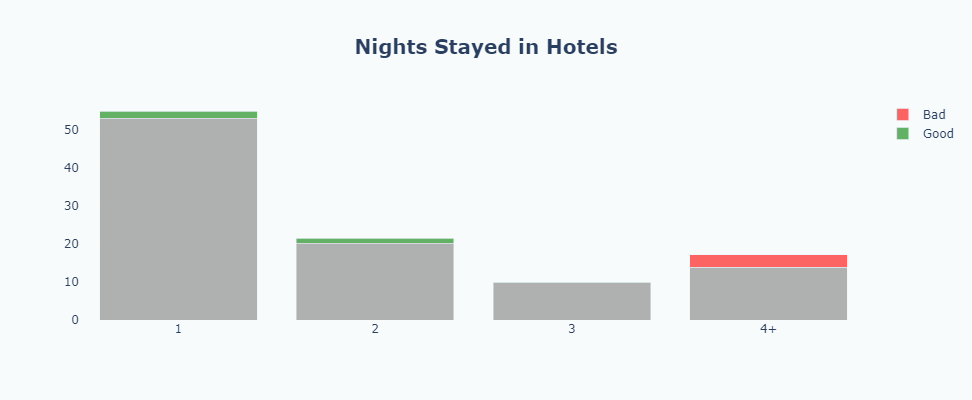

In [13]:


fig = make_subplots(rows=1, cols=1,
                    #vertical_spacing = 0.04,
subplot_titles=("",""))

fig.add_trace(go.Bar(x=data3.index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.6, marker_color="grey",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data1.index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green"),row=1, col=1)
fig.add_trace(go.Bar(x=data2.index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.6, marker_color="red"),row=1, col=1)

cf.layout_v1(fig,"Nights Stayed in Hotels",400,500,order,"ascending")
fig.show()

# Traveller Type + Nights Stayed Subplot

In [14]:

# Stacked Histplot (Compare Proportions)
mapping_dict={1:"Good Review",0: "Bad Review"}
countries_to_include = ["Philippines"]



list_for_data=cf.categorical_eda_plots_plotly(df_og,"occupant_type",
                                    target_mapping=mapping_dict,
                                    #column_mapping_list=countries_to_include,
                                    hue="good_review", 
                                    time_series=False,  
                                        )

data1,data2,data3,order,order_green, order_red=list_for_data

In [15]:
df_ns=df_og.copy()
df_ns["nights_stayed"]=df_ns["nights_stayed_"].apply(lambda x: str(x))

mapping_dict={1:"Good Review",0: "Bad Review"}
values_to_include = ["1","2","3"]



list_for_data=cf.categorical_eda_plots_plotly(df_ns,"nights_stayed",
                                    target_mapping=mapping_dict,
                                    column_mapping_list=values_to_include,others_name="4+",
                                    hue="good_review", 
                                    time_series=False,  
                                    )

data1_,data2_,data3_,order_,order_green_, order_red_=list_for_data


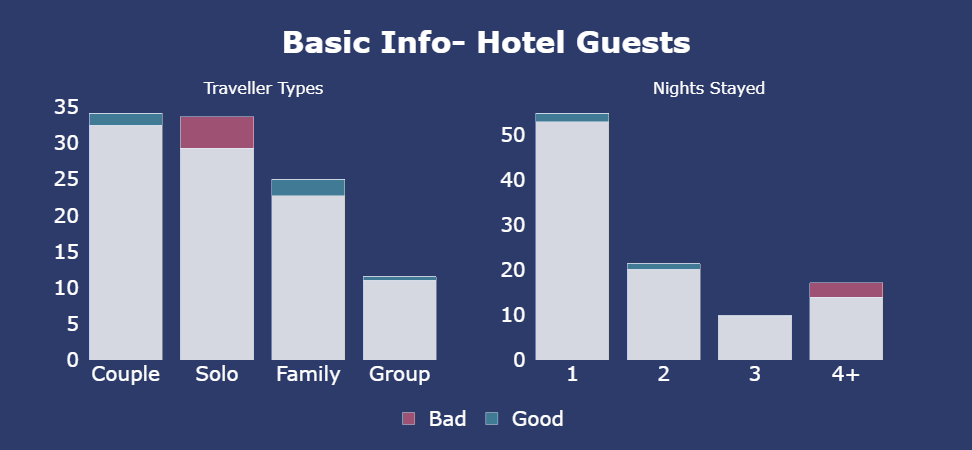

In [22]:
fig = make_subplots(rows=1, cols=2,
                    #vertical_spacing = 0.04,
subplot_titles=("Traveller Types","Nights Stayed"))

fig.add_trace(go.Bar(x=data3.rename(index={"Solo traveler": "Solo"}).index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.8, marker_color="white",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data1.rename(index={"Solo traveler": "Solo"}).index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.9, marker_color="#448299",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data2.rename(index={"Solo traveler": "Solo"}).index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.9, marker_color="#AB5475",showlegend=False,),row=1, col=1)


fig.add_trace(go.Bar(x=data3_.index, y=data3_[data3_.columns[0]].values.tolist(),name="", opacity=0.8, marker_color="white",showlegend=False,),row=1, col=2)
fig.add_trace(go.Bar(x=data1_.index, y=data1_[data1_.columns[0]].values.tolist(),name="Good", opacity=0.9, marker_color="#448299"),row=1, col=2)
fig.add_trace(go.Bar(x=data2_.index, y=data2_[data2_.columns[0]].values.tolist(),name="Bad", opacity=0.9, marker_color="#AB5475"),row=1, col=2)


new_order=[i.replace("Solo traveler", "Solo") for i in order]
cf.update_layout(fig,"Basic Info- Hotel Guests",450,900,bgcolor="#2D3B6A",font_color="white",show_ygrid=False,title_font=30,title_y=0.93)
cf.update_layout_order(fig,order_)
fig.update_xaxes(categoryorder='array', categoryarray=new_order, row=1,col=1 )
fig.update_xaxes(categoryorder='category ascending',row=1,col=2)
cf.update_layout_legend(fig,0.38,-0.15,orientation="h")

fig.show()

In [18]:
cf.update_layout(fig,"Comparing Proportions <br>Local Vs Foreign",450,500,bgcolor="#2D3B6A",font_color="white",show_ygrid=False)
cf.update_layout_order(fig,new_order)
cf.update_layout_legend(fig,0.25,-0.15,orientation="h")

# Timeseries

## __Month

In [14]:

mapping_dict={1:"Good Review",0: "Bad Review"}
values_to_include = ["1","2","3"]



list_for_data=cf.categorical_eda_plots_plotly(df_og,"month_name",
                                    target_mapping=mapping_dict,
                                    #column_mapping_list=values_to_include,others_name="4+",
                                    hue="good_review", 
                                    time_series=True,month_data=True,  long_dates=True,
                                    )

data1,data2,data3,order,order_green, order_red=list_for_data

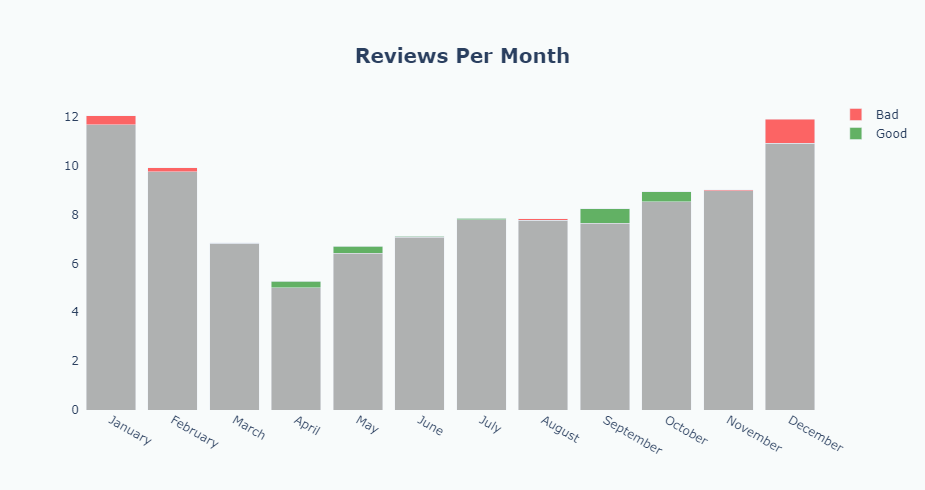

In [15]:
fig = make_subplots(rows=1, cols=1,
                    #vertical_spacing = 0.04,
subplot_titles=("",""))


fig.add_trace(go.Bar(x=data3.index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.6, marker_color="grey",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data1.index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green"),row=1, col=1)
fig.add_trace(go.Bar(x=data2.index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.6, marker_color="red"),row=1, col=1)

cf.layout_v1(fig,"Reviews Per Month",490,1000,order)
fig.show()

## Year

In [16]:

mapping_dict={1:"Good Review",0: "Bad Review"}
values_to_include = ["1","2","3"]



list_for_data=cf.categorical_eda_plots_plotly(df_og,"year",
                                    target_mapping=mapping_dict,
                                    #column_mapping_list=values_to_include,others_name="4+",
                                    hue="good_review", 
                                    time_series=True,
                                    )

data1,data2,data3,order,order_green, order_red=list_for_data

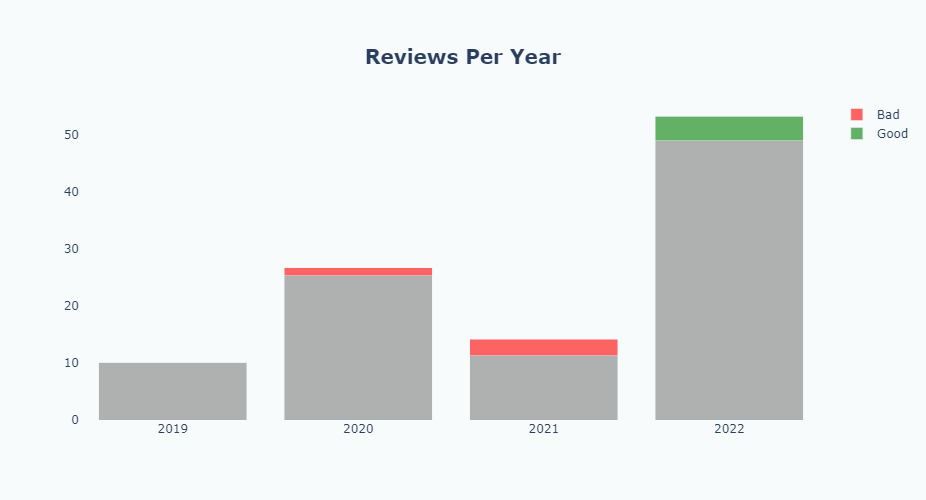

In [17]:




fig = make_subplots(rows=1, cols=1,
                    #vertical_spacing = 0.04,
subplot_titles=("",""))




fig.add_trace(go.Bar(x=data3.index, y=data3[data3.columns[0]].values.tolist(),name="", opacity=0.6, marker_color="grey",showlegend=False,),row=1, col=1)
fig.add_trace(go.Bar(x=data1.index, y=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green"),row=1, col=1)
fig.add_trace(go.Bar(x=data2.index, y=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.6, marker_color="red"),row=1, col=1)


cf.layout_v1(fig,"Reviews Per Year",500,700,order)
fig.show()

# Reviews

In [18]:
reviews_uni = pickle.load(open('../all_charts/data/reviews_unigram.pkl', "rb"))
reviews_uni

word  count
2        location      1
3           price      1
5         country      1
7           thank      1
8          comfty      1
...           ...    ...
23313  hidden_gem      1
23314  discourage      1
23315   disparage      1
23317       thank      1
23318       staff      1

[19724 rows x 2 columns]

In [19]:
mask=np.array(Image.open('msgbox.png'))
#https://matplotlib.org/stable/tutorials/colors/colormaps.html
colors = ImageColorGenerator(mask)

# Create a word cloud image
wc = WordCloud(scale=3,
                background_color="white", 
                 max_words=100, mask=mask,
                 collocations=False,
               #stopwords=stopwords, 
               contour_width=10, 
               contour_color='black',
               colormap="tab20c",
               #colormap='Accent',
               #color_func="black",
               width=500, height=500
               )

# Generate a wordcloud
wc.generate(" ".join(tweet for tweet in reviews_uni.word))

# # store to file
# wc.to_file("tweet.png")



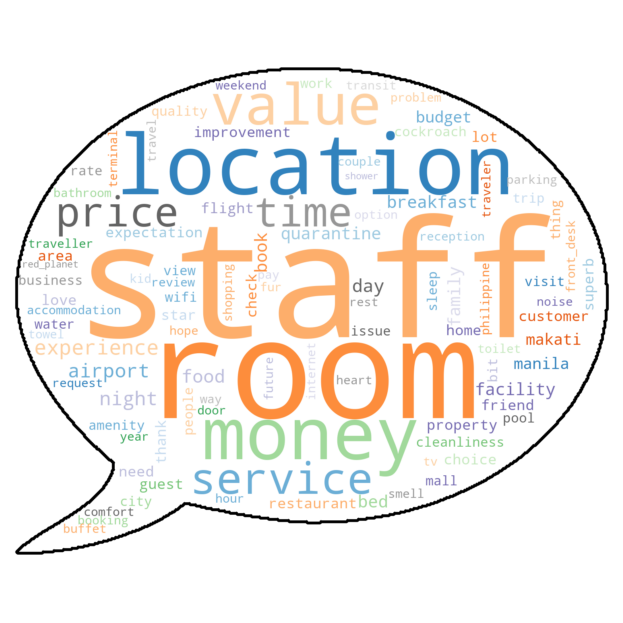

In [20]:
# show
plt.figure(figsize=[15,8],dpi=100)
#plt.imshow(wc, interpolation='bilinear')
plt.imshow(wc, interpolation='bilinear',cmap=plt.cm.gray)
plt.axis("off")
plt.show()

# Hotel Quality- Stars and Number of Facilities

In [30]:
columns=['stars','review_rating','total_reviews','facilities_count','cheapest_price']
df_hotel_level=pickle.load(open("../data/hotel_info_final.pkl", "rb"))
df_hotel_level.shape

df_hotel_level[columns].info()

df_hotel_level['review_rating']=df_hotel_level['review_rating'].astype(float)
df_hotel_level['facilities_count']=df_hotel_level['facilities_count'].astype(float)
df_hotel_level['total_reviews']=df_hotel_level['total_reviews'].apply(lambda x: float(x.replace(",","")))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 306
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   stars             307 non-null    int64  
 1   review_rating     307 non-null    object 
 2   total_reviews     307 non-null    object 
 3   facilities_count  307 non-null    int64  
 4   cheapest_price    307 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 14.4+ KB


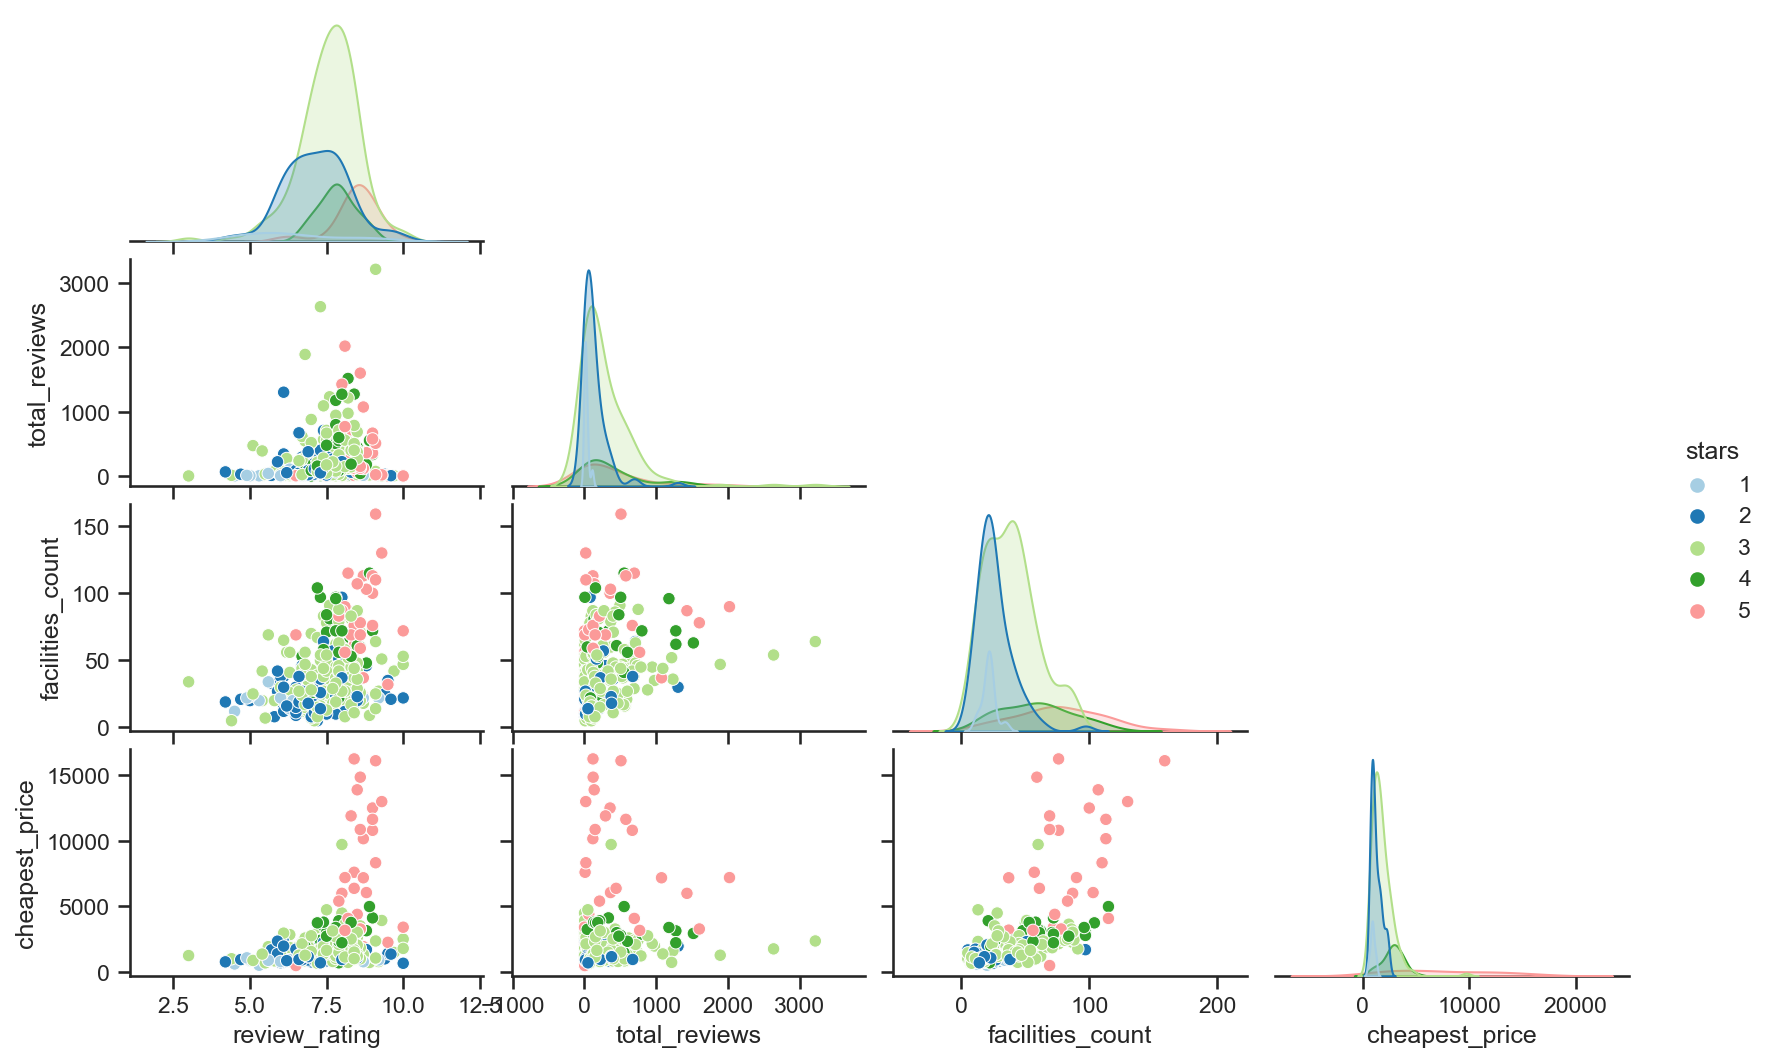

In [31]:
#sns.color_palette("hls", 8)
#g=sns.pairplot(df_hotel_level[columns], hue="stars",palette="Paired",corner=True)
#g.fig.set_size_inches(12,7)

sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
#sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'})

sns.set(style="ticks")

g=sns.pairplot(df_hotel_level[columns], 
            hue="stars",
            palette="Paired",
            corner=True,
            )
            
g.fig.set_size_inches(12,7)




In [48]:
data1=df_hotel_level[["review_rating","total_reviews","cheapest_price","stars","facilities_count"]]

data1_=data1[data1.stars<4]
data2_=data1[data1.stars>=4]
data1_

review_rating  total_reviews  cheapest_price  stars  facilities_count
0             6.00          88.00          977.00      2             22.00
1             8.00          79.00        1,709.00      2             97.00
3             7.80          45.00        2,160.00      3             38.00
4             6.80         113.00        1,125.00      3             11.00
5             6.70         123.00          994.00      3             12.00
..             ...            ...             ...    ...               ...
300           8.40         400.00        1,026.00      3             11.00
302           6.90         378.00        1,176.00      2             18.00
303           6.80       1,892.00        1,286.00      3             47.00
305           7.30          49.00          708.00      2             14.00
306           7.50         173.00        1,657.00      3             54.00

[247 rows x 5 columns]

In [49]:
g

test


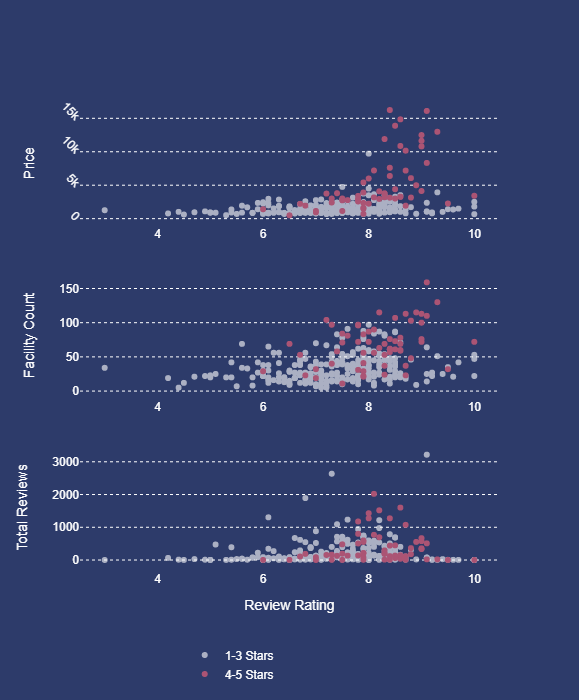

In [63]:
g=Graphs()
fig = make_subplots(rows=3, cols=1,
                    vertical_spacing = 0.1,
                     horizontal_spacing = 0.1,
#subplot_titles=("Review Rating vs Price","Review Rating vs Facility Count", "Review Rating vs Total Reviews")
           #          specs=[[{}, {}],
           # [{"colspan": 1}, {"colspan": 1}]],
                   )


#x=data1.rename(index={"Philippines":'Local'}).index
fig.add_trace(go.Scatter(x=data1_.review_rating, y=data1_.cheapest_price,name="1-3 Stars", opacity=0.6, marker_color="white",showlegend=True,mode='markers'),row=1, col=1)
fig.add_trace(go.Scatter(x=data1_.review_rating, y=data1_.facilities_count,name="", opacity=0.6, marker_color="white",showlegend=False,mode='markers'),row=2, col=1)
fig.add_trace(go.Scatter(x=data1_.review_rating, y=data1_.total_reviews,name="", opacity=0.6, marker_color="white",showlegend=False,mode='markers'),row=3, col=1)


fig.add_trace(go.Scatter(x=data2_.review_rating, y=data2_.cheapest_price,name="4-5 Stars", opacity=1, marker_color=g.maroon,showlegend=True,mode='markers'),row=1, col=1)
fig.add_trace(go.Scatter(x=data2_.review_rating, y=data2_.facilities_count,name="", opacity=1, marker_color=g.maroon,showlegend=False,mode='markers'),row=2, col=1)
fig.add_trace(go.Scatter(x=data2_.review_rating, y=data2_.total_reviews,name="", opacity=1, marker_color=g.maroon,showlegend=False,mode='markers'),row=3, col=1)


#fig.add_trace(go.Scatter(x=data1.review_rating, y=data1.stars,name="", opacity=0.8, marker_color="white",showlegend=False,mode='markers'),row=2, col=2)


#new_order=[i.replace('Philippines', 'Local') for i in order]
cf.update_layout(fig,"",700,400,bgcolor="#2D3B6A",font_color="white",show_ygrid=True, font_size=12)
#cf.update_layout_order(fig,new_order)
cf.update_layout_legend(fig,0.25,-0.15,orientation="v")

#fig.update_xaxes(title_text="Review Rating",row=1,col=1)
fig.update_yaxes(title_text="Price",row=1,col=1)

#fig.update_xaxes(title_text="Review Rating",row=1,col=2)
fig.update_yaxes(title_text="Facility Count",row=2,col=1)

fig.update_xaxes(title_text="Review Rating",row=3,col=1)
fig.update_yaxes(title_text="Total Reviews",row=3,col=1)
fig.show(render="browser")

# Facilities

In [23]:
df_faci = pickle.load(open("data/hotel_level_features.pkl", "rb"))
faci_cols=df_faci.columns.tolist()[15:]
df_faci=df_faci[['hotel_name_'] + faci_cols]

df_faci=df_faci.loc[:,~df_faci.columns.str.contains('_y', case=False)] 

#Drop duplicate values
df_faci.drop(["facilities_count","non-smoking rooms","upper floors accessible by elevator"], axis=1,inplace=True)

df_hotel_level=pickle.load(open("data/hotel_info_final.pkl", "rb"))
df_hotel_level=df_hotel_level[["hotel_name_","review_rating"]]
df_hotel_level

df1=pd.merge(df_faci,df_hotel_level, on="hotel_name_", how="left")
df1['review_rating']=df1['review_rating'].astype(float)
df1['good_review']=np.where(df1["review_rating"]>=7.5,1,0)


In [24]:
df_faci

hotel_name_  non smoking rooms  free wifi internet access included  breakfast  \
0    RedDoorz near East Avenue Medical Center                  1                                   1          1   
1                           Skylab Guesthouse                  1                                   0          0   
2               The Excelsior Hotel Las Piñas                  1                                   0          1   
3                               Rothman Hotel                  1                                   0          1   
4                  OYO 772 Remedios Apartment                  1                                   1          0   
..                                        ...                ...                                 ...        ...   
302                    RedDoorz at EDSA Pasay                  0                                   1          0   
303                       Kabayan Hotel Pasay                  1                                   1          1   
304      Crimson Hotel Filinvest City, Manila                  1                                   0          1   
305      RedDoorz @ Jardin LRT Tayuman Manila                  1                                   1          1   
306                        88 Courtyard Hotel                  1                                   1          1   

     room-service  free parking  24 hour front desk  restaurant_x  bar_x  airport shuttle_x  swimming pool  \
0               0             0                   1             0      0                  0              0   
1               0             1                   0             1      0                  0              0   
2               1             1                   0             0      1                  1              1   
3               1             1                   0             1      1                  0              0   
4               0             0                   0             0      0                  0              0   
..            ...           ...                 ...           ...    ...                ...            ...   
302             0             0                   0             0      0                  0              0   
303             1             0                   0             1      0                  0              0   
304             1             1                   0             1      1                  1              1   
305             0             0                   0             0      0                  0              0   
306             1             1                   0             0      0                  1              0   

     fitness room  coffee/tea maker  family rooms_x  spa & wellness centre  rooms/facilities for disabled  \
0               0                 0               1                      0                              0   
1               0                 1               0                      1                              0   
2               1                 0               0                      1                              0   
3               0                 0               0                      0                              1   
4               0                 0               0                      0                              0   
..            ...               ...             ...                    ...                            ...   
302             0                 0               0                      0                              0   
303             0                 0               1                      0                              0   
304             1                 0               0                      0                              0   
305             0                 0               1                      0                              0   
306             0                 0               0                      0                              0   

     air conditioning  

In [25]:

def get_long_format_proportions (df_faci):
    df_to_melt=df_faci.drop(["review_rating","good_review"], axis=1)
    long_df = pd.melt(
        df_to_melt,
        id_vars=['hotel_name_'],
        #value_vars=['inc_q', 'age']
    )

    long_df


    grouped=long_df.groupby(["variable"]).agg(
        sum_=('value', 'sum'),
        count_=('hotel_name_', 'count')).sort_values(by="sum_", ascending=False).reset_index()

    grouped["Proportion"]=grouped["sum_"]/grouped["count_"]*100
    return grouped

In [26]:
green=get_long_format_proportions (df1[df1.good_review==1])[["variable","Proportion"]]
red=get_long_format_proportions (df1[df1.good_review==0])[["variable","Proportion"]]

merged=pd.merge(green,red,on="variable", how="outer")
merged.columns=["Variable", "Green_prop","Red_prop"]

merged.set_index("Variable",inplace=True)
min=merged.min(axis=1)
merged=merged.sub(merged.min(axis=1).values, axis='rows')
merged["Min"]=min


data1=merged[[merged.columns[0]]]
data2=merged[[merged.columns[1]]]
data3=merged[["Min"]]



#Return custom Orders
order=data3.sort_values(by="Min",ascending=False).index
order_green=data1.sort_values(by=merged.columns[0],ascending=False).index
order_red=data2.sort_values(by=merged.columns[1],ascending=False).index

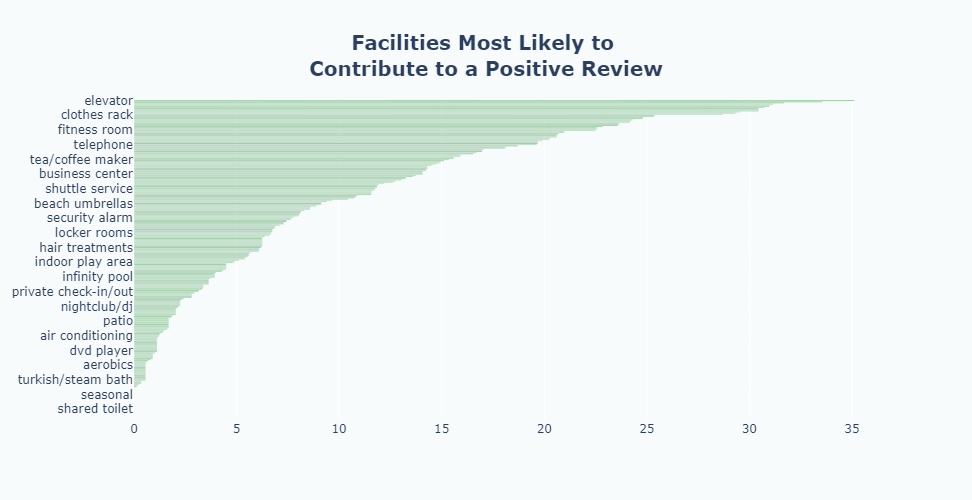

In [27]:
fig = make_subplots(rows=1, cols=1,
                    #vertical_spacing = 0.04,
subplot_titles=("",""))


#fig.add_trace(go.Bar(y=data3.index, x=data3[data3.columns[0]].values.tolist(),name="", opacity=0.6, marker_color="grey",showlegend=False,orientation='h',width=0.5),row=1, col=1)
fig.add_trace(go.Bar(y=data1.index, x=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green",orientation='h'),row=1, col=1)
#fig.add_trace(go.Bar(y=data2.index, x=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.6, marker_color="red",orientation='h'),row=1, col=2)

#fig.add_trace(go.Bar(y=data1.index, x=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green",width=100),row=1, col=1)

cf.layout_v2(fig,"Facilities Most Likely to <br>Contribute to a Positive Review",500,600,order_green)
fig.show()

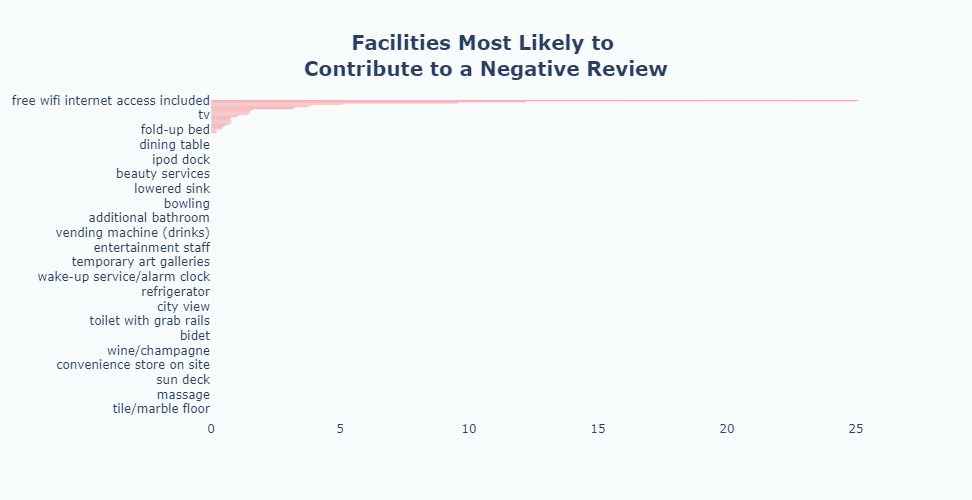

In [28]:
fig = make_subplots(rows=1, cols=1,
                    #vertical_spacing = 0.04,
subplot_titles=("",""))


#fig.add_trace(go.Bar(y=data3.index, x=data3[data3.columns[0]].values.tolist(),name="", opacity=0.6, marker_color="grey",showlegend=False,orientation='h',width=0.5),row=1, col=1)
#fig.add_trace(go.Bar(y=data1.index, x=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green",orientation='h'),row=1, col=1)
fig.add_trace(go.Bar(y=data2.index, x=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.6, marker_color="red",orientation='h'),row=1, col=1)

cf.layout_v2(fig,"Facilities Most Likely to <br>Contribute to a Negative Review",500,600,order_red)
fig.show()

# Location

In [3]:
df_loc=pickle.load(open('../data/hotel_level_features.pkl','rb'))

df_hotel_level=pickle.load(open("data/hotel_info_final.pkl", "rb"))
#df_hotel_level=df_hotel_level[["hotel_name_","review_rating","cheapest_price","city"]]
df_price=pickle.load(open("data/hotel_info_final.pkl", "rb"))[["hotel_name_","cheapest_price"]]

df1=pd.merge(df_loc,df_hotel_level, on="hotel_name_", how="left")
df1['review_rating']=df1['review_rating'].astype(float)
df1['good_review']=np.where(df1["review_rating"]>=7.5,1,0)
#df2=pd.merge(df1,df_price,on="hotel_name_",how="left")
#df2

In [4]:
df1.groupby(["city"])[['review_rating']].mean().sort_values(by="review_rating", ascending=True).tail(7)

review_rating
city                      
Mandaluyong           7.50
Parañaque             7.56
Taguig                7.56
Marikina              7.60
Quezon City           7.71
Makati                7.78
Pasig                 8.07

review_rating
city                      
Taguig                7.56
Marikina              7.60
Quezon City           7.71

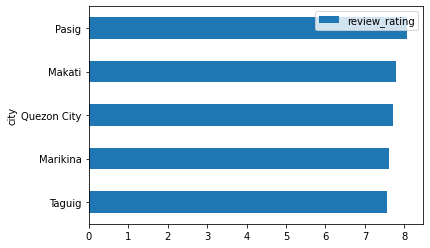

In [38]:
grouped=df1.groupby(["city"])[['review_rating']].mean().sort_values(by="review_rating", ascending=True).tail(5)
grouped.plot.barh()
grouped
data1=grouped[(grouped.index=="Makati") | (grouped.index=="Pasig")]
data2=grouped[~((grouped.index=="Makati") | (grouped.index=="Pasig"))]
data2

test


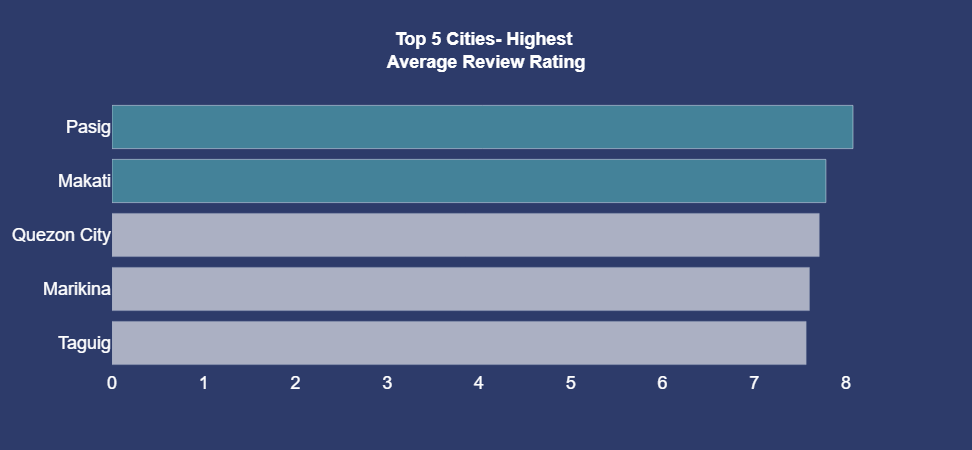

In [45]:
fig = make_subplots(rows=1, cols=1,
                    #vertical_spacing = 0.04,
subplot_titles=("",""))


#fig.add_trace(go.Bar(y=data3.index, x=data3[data3.columns[0]].values.tolist(),name="", opacity=0.6, marker_color="grey",showlegend=False,orientation='h',width=0.5),row=1, col=1)
#fig.add_trace(go.Bar(y=data1.index, x=data1[data1.columns[0]].values.tolist(),name="Good", opacity=0.6, marker_color="green",orientation='h'),row=1, col=1)
fig.add_trace(go.Bar(y=data2.index, x=data2[data2.columns[0]].values.tolist(),name="Bad", opacity=0.6, marker_color="white",orientation='h',showlegend=False),row=1, col=1)
fig.add_trace(go.Bar(y=data1.index, x=data1[data1.columns[0]].values.tolist(),name="Bad", opacity=1, marker_color=g.navy_green,orientation='h',showlegend=False),row=1, col=1)

#cf.layout_v2(fig,"Top 5 Cities- Highest Review Ratings",500,600,[])
#new_order=[i.replace('Philippines', 'Local') for i in order]

cf.update_layout(fig,"Top 5 Cities- Highest <br>Average Review Rating",450,500,bgcolor="#2D3B6A",font_color="white",font_size=18,show_ygrid=False)
#cf.update_layout_order(fig,new_order)
#cf.update_layout_legend(fig,0.25,-0.15,orientation="h")
fig.show()

<AxesSubplot:ylabel='city'>

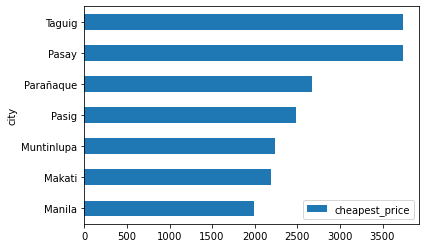

In [23]:
df1.groupby(["city"])[['cheapest_price']].mean().sort_values(by="cheapest_price", ascending=True).tail(7).plot.barh()

## Expand surroundings

In [7]:
df_hotel_level

hotel_name_  stars                                           location review_rating  \
0    RedDoorz near East Avenue Medical Center      2  90 Matatag Street, Quezon City, 1100 Manila, P...           6.0   
1                           Skylab Guesthouse      2  213B, Aldrin Street, Moonwalk Village 1, Parañ...           8.0   
2               The Excelsior Hotel Las Piñas      4  1345 Alabang–Zapote Road, Las Pinas, 1750 Mani...           7.3   
3                               Rothman Hotel      3  1633 M. Adriatico St., Malate, 1004 Manila, Ph...           7.8   
4                  OYO 772 Remedios Apartment      3  909, Remedios St, Manila Malate Manila, 1004 M...           6.8   
..                                        ...    ...                                                ...           ...   
302                    RedDoorz at EDSA Pasay      2  525 EDSA, Pasay City, Pasay, 1300 Manila, Phil...           6.9   
303                       Kabayan Hotel Pasay      3  2878 Zamora Street corner EDSA Rotonda, Pasay,...           6.8   
304      Crimson Hotel Filinvest City, Manila      5  2609 Civic Drive, Entrata Urban Complex, Filin...           8.1   
305      RedDoorz @ Jardin LRT Tayuman Manila      2        1830 Rizal Avenue, 1008 Manila, Philippines           7.3   
306                        88 Courtyard Hotel      3  24 Roxas Boulevard, corner Cuneta Avenue, Pasa...           7.5   

                                           description                                    main_facilities  \
0    RedDoorz near East Avenue Medical Center featu...  [Non Smoking Rooms, Free WiFi Internet Access ...   
1    You're eligible for a Genius discount at Skyla...  [Non Smoking Rooms, Spa & Wellness Centre, Fre...   
2    Located in Manila, 12.2 km from Mall of Asia A...  [Swimming pool, Airport Shuttle, Non Smoking R...   
3    Rothman Hotel is located in the district of Ma...  [Non Smoking Rooms, Room-service, Free Parking...   
4    You're eligible for a Genius discount at OYO 7...  [Non Smoking Rooms, Free WiFi Internet Access ...   
..                                                 ...                                                ...   
302  Located in Manila within 2.7 km of Mall of Asi...  [Free WiFi Internet Access Included, Free WiFi...   
303  You're eligible for a Genius discount at Kabay...  [Non Smoking Rooms, Room-service, Free WiFi In...   
304  You're eligible for a Genius discount at Crims...  [Swimming pool, Airport Shuttle, Non Smoking R...   
305  Ideally located in the Santa Cruz district of ...  [Non Smoking Rooms, Free WiFi Internet Access ...   
306  You're eligible for a Genius discount at 88 Co...  [Airport Shuttle, Non Smoking Rooms, Room-serv...   

    total_reviews                          sub_ratings                             sub_ratings_categories  \
0              88  [6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]  [Staff, Facilities, Cleanliness, Comfort, Valu...   
1              79  [8.8, 7.8, 8.3, 8.4, 8.4, 8.1, 7.5]  [Staff, Facilities, Cleanliness, Comfort, Valu...   
2               6  [7.9, 8.3, 7.9, 8.8, 7.9, 7.9, 7.9]  [Staff, Facilities, Cleanliness, Comfort, Valu...   
3              45  [8.3, 7.6, 8.0, 7.8, 7.8, 8.7, 8.8]  [Staff, Facilities, Cleanliness, Comfort, Valu...   
4             113  [7.5, 6.5, 6.9, 6.9, 7.0, 7.7, 8.8]  [Staff, Facilities, Cleanliness, Comfort, Valu...   
..            ...                                  ...                                                ...   
302           378  [7.6, 7.0, 7.4, 7.3, 7.4, 7.6, 7.3]  [Staff, Facilities, Cleanliness, Comfort, Valu...   
303         1,892  [8.1, 6.8, 6.9, 7.0, 7.0, 7.6, 7.2]  [Staff, Facilities, Cleanliness, Comfort, Valu...   
304           769  [8.8, 8.2, 8.4, 8.5, 8.2, 8.9, 7.8]  [Staff, Facilities, Cleanliness, Comfort, Valu...   
305            49  [7.8, 7.5, 7.6, 7.7, 7.6, 8.0, 4.2]  [Staff, Facilities, Cleanliness, Comfort, Valu...   
306           173  [8.4, 7.4, 7.7, 7.8, 7.5, 8.1, 5.8]  [Staff, Facilitie

In [8]:
hs=df_hotel_level["hotel_surroundings"]

df_wide_1=hs.apply(pd.Series)
df_wide_1["hotel_name_"]=df_hotel_level.hotel_name_

long_df_1 = pd.melt(
    df_wide_1,
    id_vars=['hotel_name_'],
    #value_vars=['inc_q', 'age']
)

long_df_1


hotel_name_ variable                             value
0      RedDoorz near East Avenue Medical Center        0  Quezon City Hall Park and Lagoon
1                             Skylab Guesthouse        0                    Barcelona Park
2                 The Excelsior Hotel Las Piñas        0           Philamlife Village Park
3                                 Rothman Hotel        0                    Pedro Gil Park
4                    OYO 772 Remedios Apartment        0                   Remedios Circle
...                                         ...      ...                               ...
10740                    RedDoorz at EDSA Pasay       34       Clark International Airport
10741                       Kabayan Hotel Pasay       34       Clark International Airport
10742      Crimson Hotel Filinvest City, Manila       34                               NaN
10743      RedDoorz @ Jardin LRT Tayuman Manila       34                 Subic Bay Airport
10744                        88 Courtyard Hotel       34                               NaN

[10745 rows x 3 columns]

In [9]:

hs=df_hotel_level["hotel_surroundings_distance"]

df_wide_2=hs.apply(pd.Series)
df_wide_2["hotel_name_"]=df_hotel_level.hotel_name_

long_df_2 = pd.melt(
    df_wide_2,
    id_vars=['hotel_name_'],
    #value_vars=['inc_q', 'age']
)

long_df_2


hotel_name_ variable  value
0      RedDoorz near East Avenue Medical Center        0  900 m
1                             Skylab Guesthouse        0  950 m
2                 The Excelsior Hotel Las Piñas        0  550 m
3                                 Rothman Hotel        0  250 m
4                    OYO 772 Remedios Apartment        0  600 m
...                                         ...      ...    ...
10740                    RedDoorz at EDSA Pasay       34  87 km
10741                       Kabayan Hotel Pasay       34  86 km
10742      Crimson Hotel Filinvest City, Manila       34    NaN
10743      RedDoorz @ Jardin LRT Tayuman Manila       34  79 km
10744                        88 Courtyard Hotel       34    NaN

[10745 rows x 3 columns]

In [10]:
cols=['hotel_name_','value']
combined_long_df=pd.concat([long_df_1[cols],long_df_2[cols]], axis=1)
combined_long_df.columns=['hotel_name','surroundings','name2', 'distance']
combined_long_df.drop('name2', axis=1,inplace=True)

combined_long_df




hotel_name                      surroundings distance
0      RedDoorz near East Avenue Medical Center  Quezon City Hall Park and Lagoon    900 m
1                             Skylab Guesthouse                    Barcelona Park    950 m
2                 The Excelsior Hotel Las Piñas           Philamlife Village Park    550 m
3                                 Rothman Hotel                    Pedro Gil Park    250 m
4                    OYO 772 Remedios Apartment                   Remedios Circle    600 m
...                                         ...                               ...      ...
10740                    RedDoorz at EDSA Pasay       Clark International Airport    87 km
10741                       Kabayan Hotel Pasay       Clark International Airport    86 km
10742      Crimson Hotel Filinvest City, Manila                               NaN      NaN
10743      RedDoorz @ Jardin LRT Tayuman Manila                 Subic Bay Airport    79 km
10744                        88 Courtyard Hotel                               NaN      NaN

[10745 rows x 3 columns]

In [11]:
combined_long_df.dropna(inplace=True)
combined_long_df["distance_amt"]=combined_long_df["distance"].apply(lambda x: x.split(" ")[0])
combined_long_df["unit"]=combined_long_df["distance"].apply(lambda x: x.split(" ")[1])

combined_long_df

hotel_name                      surroundings distance distance_amt unit
0      RedDoorz near East Avenue Medical Center  Quezon City Hall Park and Lagoon    900 m          900    m
1                             Skylab Guesthouse                    Barcelona Park    950 m          950    m
2                 The Excelsior Hotel Las Piñas           Philamlife Village Park    550 m          550    m
3                                 Rothman Hotel                    Pedro Gil Park    250 m          250    m
4                    OYO 772 Remedios Apartment                   Remedios Circle    600 m          600    m
...                                         ...                               ...      ...          ...  ...
10736                 Selah Garden Hotel Manila       Clark International Airport    86 km           86   km
10738                airobedz BGC - near Uptown                 Subic Bay Airport    88 km           88   km
10740                    RedDoorz at EDSA Pasay       Clark International Airport    87 km           87   km
10741                       Kabayan Hotel Pasay       Clark International Airport    86 km           86   km
10743      RedDoorz @ Jardin LRT Tayuman Manila                 Subic Bay Airport    79 km           79   km

[10047 rows x 5 columns]

In [12]:
def adjusted_distance(df):
    if df["unit"]=="m":
        return float(df["distance_amt"].replace(",",""))/1000
    return float(df["distance_amt"])

combined_long_df["distance_"]=combined_long_df.apply(adjusted_distance,axis=1)
combined_long_df.drop(["distance",'distance_amt','unit'], axis=1,inplace=True)
combined_long_df

hotel_name                      surroundings  distance_
0      RedDoorz near East Avenue Medical Center  Quezon City Hall Park and Lagoon       0.90
1                             Skylab Guesthouse                    Barcelona Park       0.95
2                 The Excelsior Hotel Las Piñas           Philamlife Village Park       0.55
3                                 Rothman Hotel                    Pedro Gil Park       0.25
4                    OYO 772 Remedios Apartment                   Remedios Circle       0.60
...                                         ...                               ...        ...
10736                 Selah Garden Hotel Manila       Clark International Airport      86.00
10738                airobedz BGC - near Uptown                 Subic Bay Airport      88.00
10740                    RedDoorz at EDSA Pasay       Clark International Airport      87.00
10741                       Kabayan Hotel Pasay       Clark International Airport      86.00
10743      RedDoorz @ Jardin LRT Tayuman Manila                 Subic Bay Airport      79.00

[10047 rows x 3 columns]

In [13]:
def subgroups(df):
    public_transpo=["train","subway","metro"]
    parks=["park","garden"]

    if "airport" in df["surroundings"].lower():
        return "airport"
    elif (df["surroundings"].lower() in public_transpo):
        return "public_transpo"

    elif ("park" in df["surroundings"].lower()) |("garden" in df["surroundings"].lower()):
        return "park"
        
    elif ("ocean" in df["surroundings"].lower()) | ("sea" in df["surroundings"].lower()) | ("beach" in df["surroundings"].lower()):
        return "sea"

    elif "mountain" in df["surroundings"].lower():
        return "mountain"
    elif "museum" in df["surroundings"].lower():
        return "museum"

    elif "restaurant" in df["surroundings"].lower():
        return "restaurant"

    elif "cafe/bar" in df["surroundings"].lower():
        return "cafe_bar"
    else:
        return "others"


def main_groups(df):

    nearby_attractions=["others","park","museum"]
    food=["cafe_bar",'restaurant']
    nature=["sea","mountain"]
    if df["subgroup"] in nearby_attractions:
        return "nearby_attractions"

    elif df["subgroup"] in food:
        return "resto_bar"

    elif df["subgroup"] in nature:
        return "nature"

    else:
        return df["subgroup"]

df_=combined_long_df#[combined_long_df.hotel_name=="OYO 772 Remedios Apartment"]

df_["subgroup"]=df_.apply(subgroups,axis=1)
df_["maingroup"]=df_.apply(main_groups, axis=1 )
df_

hotel_name                      surroundings  distance_ subgroup  \
0      RedDoorz near East Avenue Medical Center  Quezon City Hall Park and Lagoon       0.90     park   
1                             Skylab Guesthouse                    Barcelona Park       0.95     park   
2                 The Excelsior Hotel Las Piñas           Philamlife Village Park       0.55     park   
3                                 Rothman Hotel                    Pedro Gil Park       0.25     park   
4                    OYO 772 Remedios Apartment                   Remedios Circle       0.60   others   
...                                         ...                               ...        ...      ...   
10736                 Selah Garden Hotel Manila       Clark International Airport      86.00  airport   
10738                airobedz BGC - near Uptown                 Subic Bay Airport      88.00  airport   
10740                    RedDoorz at EDSA Pasay       Clark International Airport      87.00  airport   
10741                       Kabayan Hotel Pasay       Clark International Airport      86.00  airport   
10743      RedDoorz @ Jardin LRT Tayuman Manila                 Subic Bay Airport      79.00  airport   

                maingroup  
0      nearby_attractions  
1      nearby_attractions  
2      nearby_attractions  
3      nearby_attractions  
4      nearby_attractions  
...                   ...  
10736             airport  
10738             airport  
10740             airport  
10741             airport  
10743             airport  

[10047 rows x 5 columns]

## Analysis Per Main Group

In [14]:
#For merging
df1.columns.tolist()
df1[["hotel_name_",'cheapest_price','review_rating']]

hotel_name_  cheapest_price  review_rating
0    RedDoorz near East Avenue Medical Center          977.00           6.00
1                           Skylab Guesthouse        1,709.00           8.00
2               The Excelsior Hotel Las Piñas        3,010.00           7.30
3                               Rothman Hotel        2,160.00           7.80
4                  OYO 772 Remedios Apartment        1,125.00           6.80
..                                        ...             ...            ...
302                    RedDoorz at EDSA Pasay        1,176.00           6.90
303                       Kabayan Hotel Pasay        1,286.00           6.80
304      Crimson Hotel Filinvest City, Manila        3,177.00           8.10
305      RedDoorz @ Jardin LRT Tayuman Manila          708.00           7.30
306                        88 Courtyard Hotel        1,657.00           7.50

[307 rows x 3 columns]

In [15]:
df_.maingroup.value_counts()

nearby_attractions    5884
resto_bar             1425
public_transpo        1222
airport                919
nature                 597
Name: maingroup, dtype: int64

### 1. Nearby Attractions

(5884, 5)

(2648, 5)

<AxesSubplot:ylabel='Frequency'>

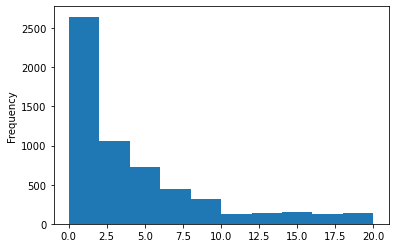

In [16]:
data1=df_[df_.maingroup=="nearby_attractions"]

display(data1.shape)
display(data1[data1.distance_<=2].shape)

data2=data1[data1.distance_<=2]
#data2=data1[(data1.distance_<=2) & (data1.subgroup=="museum")]
display(data1.distance_.plot.hist())





<AxesSubplot:ylabel='Frequency'>

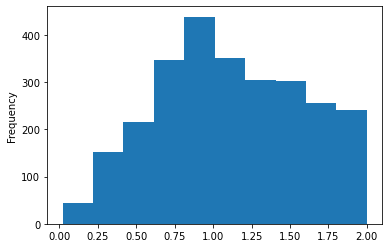

In [17]:

display(data2.distance_.plot.hist())

(304, 5)

Count_Walkable Attractions                      hotel_name_  cheapest_price  review_rating  good_review
0                           4               88 Courtyard Hotel        1,657.00           7.50            1
1                           9                       ACL Suites        2,452.00           6.00            0
2                           5          Achievers Airport Hotel        2,273.00           7.40            0
3                          12  Admiral Hotel Manila - MGallery        8,330.00           9.10            1
4                          14                Airo Hotel Manila        1,800.00           7.60            1

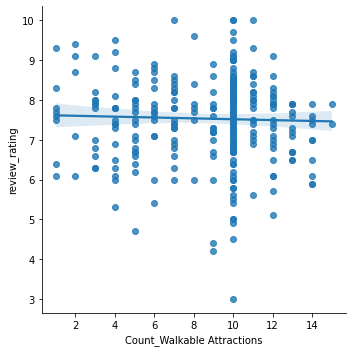

In [18]:
data3=data2.groupby(["hotel_name"])[['distance_']].count()


data3.rename(columns={"distance_": "Count_Walkable Attractions"},inplace=True)
data4=pd.merge(data3,df1[["hotel_name_",'cheapest_price','review_rating']], left_on="hotel_name",right_on="hotel_name_")
data4["good_review"]=np.where(data4.review_rating>=7.5,1,0)
display(data4.shape)
display(data4.head())
sns.lmplot(data=data4, x="Count_Walkable Attractions", y="review_rating",
            #hue="good_review"
            )


In [19]:
data1_=data4[["hotel_name_","Count_Walkable Attractions"]]
data1_.set_index("hotel_name_",inplace=True)
data1_

Count_Walkable Attractions
hotel_name_                                                         
88 Courtyard Hotel                                                 4
ACL Suites                                                         9
Achievers Airport Hotel                                            5
Admiral Hotel Manila - MGallery                                   12
Airo Hotel Manila                                                 14
...                                                              ...
airobedz MAKATI - near Cash & Carry Mall                          10
airobedz MANILA - near Taft Avenue                                10
airobedz MCKINLEY - near SM Aura                                  10
iHotel Uptown BGC                                                 10
广东大酒店                                                              3

[304 rows x 1 columns]

### 2. Public Transpo

(1222, 5)

hotel_name surroundings  distance_        subgroup       maingroup
5904                 OYO 862 Jqv Hotel       Subway      15.00  public_transpo  public_transpo
6202  RedDoorz @ Kassel North Caloocan       Subway      13.00  public_transpo  public_transpo
6211                 OYO 862 Jqv Hotel       Subway      15.00  public_transpo  public_transpo
6509  RedDoorz @ Kassel North Caloocan       Subway      14.00  public_transpo  public_transpo
6800                 Ranchotel Alabang       Subway      14.00  public_transpo  public_transpo

<AxesSubplot:ylabel='Frequency'>

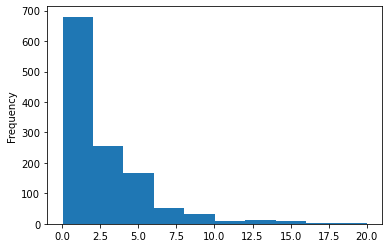

In [20]:
data1=df_[df_.maingroup=="public_transpo"]

display(data1.shape)
#display(data1[data1.distance_<=2].shape)

data2=data1#[data1.distance_<=2]
data2=data1[(data1.surroundings=="Subway")]
display(data2.head())
display(data1.distance_.plot.hist())





(307, 5)

Nearest_Subway                      hotel_name_  cheapest_price  review_rating  good_review
0            0.90               88 Courtyard Hotel        1,657.00           7.50            1
1            1.50                       ACL Suites        2,452.00           6.00            0
2            1.40          Achievers Airport Hotel        2,273.00           7.40            0
3            3.50  Admiral Hotel Manila - MGallery        8,330.00           9.10            1
4            2.80                Airo Hotel Manila        1,800.00           7.60            1

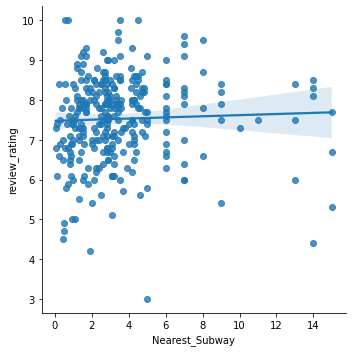

In [21]:
data3=data2.groupby(["hotel_name"])[['distance_']].min()



data3.rename(columns={"distance_": "Nearest_Subway"},inplace=True)
data4=pd.merge(data3,df1[["hotel_name_",'cheapest_price','review_rating']], left_on="hotel_name",right_on="hotel_name_")
data4["good_review"]=np.where(data4.review_rating>=7.5,1,0)
display(data4.shape)
display(data4.head())
sns.lmplot(data=data4, x="Nearest_Subway", y="review_rating",
            #hue="good_review"
            )


In [22]:
data2_ns=data4[["hotel_name_","Nearest_Subway"]]
data2_ns.set_index("hotel_name_",inplace=True)
data2_ns

Nearest_Subway
hotel_name_                                             
88 Courtyard Hotel                                  0.90
ACL Suites                                          1.50
Achievers Airport Hotel                             1.40
Admiral Hotel Manila - MGallery                     3.50
Airo Hotel Manila                                   2.80
...                                                  ...
airobedz MAKATI - near Cash & Carry Mall            3.00
airobedz MANILA - near Taft Avenue                  2.80
airobedz MCKINLEY - near SM Aura                    6.00
iHotel Uptown BGC                                   6.00
广东大酒店                                               1.40

[307 rows x 1 columns]

### 3. Airport

(919, 5)

hotel_name                        surroundings  distance_ subgroup maingroup
6518                 OYO 862 Jqv Hotel  Ninoy Aquino International Airport      28.00  airport   airport
6816  RedDoorz @ Kassel North Caloocan  Ninoy Aquino International Airport      27.00  airport   airport
6825                 OYO 862 Jqv Hotel         Clark International Airport      72.00  airport   airport
7107                 Ranchotel Alabang  Ninoy Aquino International Airport      11.00  airport   airport
7123  RedDoorz @ Kassel North Caloocan         Clark International Airport      72.00  airport   airport

<AxesSubplot:ylabel='Frequency'>

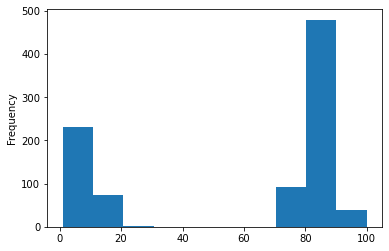

In [23]:
data1=df_[df_.maingroup=="airport"]

display(data1.shape)
#display(data1[data1.distance_<=2].shape)

data2=data1#[data1.distance_<=2]
#data2=data1[(data1.surroundings=="Metro")]
display(data2.head())
display(data1.distance_.plot.hist())





(307, 5)

Average Distance To Airports                      hotel_name_  cheapest_price  review_rating  good_review
0                         57.47               88 Courtyard Hotel        1,657.00           7.50            1
1                         61.00                       ACL Suites        2,452.00           6.00            0
2                         57.97          Achievers Airport Hotel        2,273.00           7.40            0
3                         57.00  Admiral Hotel Manila - MGallery        8,330.00           9.10            1
4                         56.33                Airo Hotel Manila        1,800.00           7.60            1

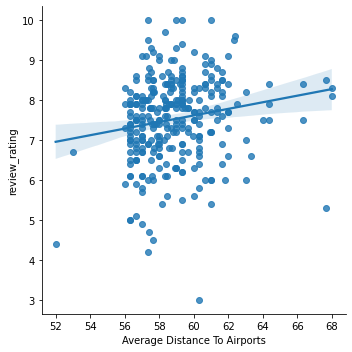

In [24]:
data3=data2.groupby(["hotel_name"])[['distance_']].mean()


data3.rename(columns={"distance_": "Average Distance To Airports"},inplace=True)
data4=pd.merge(data3,df1[["hotel_name_",'cheapest_price','review_rating']], left_on="hotel_name",right_on="hotel_name_")
data4["good_review"]=np.where(data4.review_rating>=7.5,1,0)
display(data4.shape)
display(data4.head())
sns.lmplot(data=data4, x="Average Distance To Airports", y="review_rating",
            #hue="good_review"
            )


In [25]:
data3_navg=data4[["hotel_name_","Average Distance To Airports"]]
data3_navg.set_index("hotel_name_",inplace=True)
data3_navg

Average Distance To Airports
hotel_name_                                                           
88 Courtyard Hotel                                               57.47
ACL Suites                                                       61.00
Achievers Airport Hotel                                          57.97
Admiral Hotel Manila - MGallery                                  57.00
Airo Hotel Manila                                                56.33
...                                                                ...
airobedz MAKATI - near Cash & Carry Mall                         57.67
airobedz MANILA - near Taft Avenue                               57.33
airobedz MCKINLEY - near SM Aura                                 61.67
iHotel Uptown BGC                                                61.00
广东大酒店                                                            57.20

[307 rows x 1 columns]

### 4. Resos/Bars

(1425, 5)

hotel_name surroundings  distance_    subgroup  maingroup
3070  RedDoorz near East Avenue Medical Center   Restaurant       0.10  restaurant  resto_bar
3071                         Skylab Guesthouse   Restaurant       0.10  restaurant  resto_bar
3072             The Excelsior Hotel Las Piñas   Restaurant       0.02  restaurant  resto_bar
3073                             Rothman Hotel   Restaurant       0.03  restaurant  resto_bar
3074                OYO 772 Remedios Apartment   Restaurant       0.05  restaurant  resto_bar

<AxesSubplot:ylabel='Frequency'>

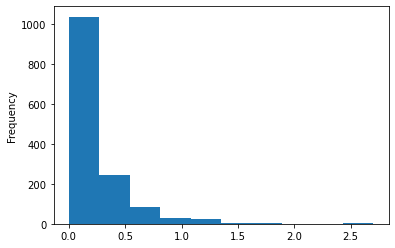

In [26]:
data1=df_[df_.maingroup=="resto_bar"]

display(data1.shape)
#display(data1[data1.distance_<=2].shape)

data2=data1#[data1.distance_<=0.1]
# data2=data1[(data1.surroundings=="Cafe/Bar") 
#                 #& (data1.distance_<=0.1)
#                 ]
display(data2.head())
display(data1.distance_.plot.hist())





(307, 5)

Average Distance of Nearby Resto/Bars                      hotel_name_  cheapest_price  review_rating  good_review
0                                   0.10               88 Courtyard Hotel        1,657.00           7.50            1
1                                   0.42                       ACL Suites        2,452.00           6.00            0
2                                   0.14          Achievers Airport Hotel        2,273.00           7.40            0
3                                   0.37  Admiral Hotel Manila - MGallery        8,330.00           9.10            1
4                                   0.08                Airo Hotel Manila        1,800.00           7.60            1

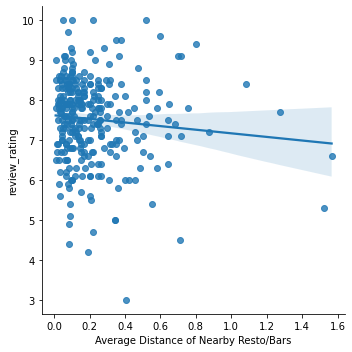

In [27]:
data3=data2.groupby(["hotel_name"])[['distance_']].mean()


data3.rename(columns={"distance_": "Average Distance of Nearby Resto/Bars"},inplace=True)
data4=pd.merge(data3,df1[["hotel_name_",'cheapest_price','review_rating']], left_on="hotel_name",right_on="hotel_name_")
data4["good_review"]=np.where(data4.review_rating>=7.5,1,0)
display(data4.shape)
display(data4.head())
sns.lmplot(data=data4, x="Average Distance of Nearby Resto/Bars", y="review_rating",
            #hue="good_review"
            )


In [28]:
data4_=data4[["hotel_name_","Average Distance of Nearby Resto/Bars"]]
data4_.set_index("hotel_name_",inplace=True)
data4_

Average Distance of Nearby Resto/Bars
hotel_name_                                                                    
88 Courtyard Hotel                                                         0.10
ACL Suites                                                                 0.42
Achievers Airport Hotel                                                    0.14
Admiral Hotel Manila - MGallery                                            0.37
Airo Hotel Manila                                                          0.08
...                                                                         ...
airobedz MAKATI - near Cash & Carry Mall                                   0.32
airobedz MANILA - near Taft Avenue                                         0.13
airobedz MCKINLEY - near SM Aura                                           0.52
iHotel Uptown BGC                                                          0.34
广东大酒店                                                                      0.14

[307 rows x 1 columns]

### 5. Nature

(597, 5)

hotel_name surroundings  distance_ subgroup maingroup
4983                 OYO 862 Jqv Hotel    Ocean/Sea      25.00      sea    nature
5281  RedDoorz @ Kassel North Caloocan    Ocean/Sea      23.00      sea    nature
5572                 Ranchotel Alabang    Ocean/Sea      16.00      sea    nature
5679          Vivere Hotel and Resorts    Ocean/Sea      16.00      sea    nature
5838         OYO 717 Ranchotel Bayanan    Ocean/Sea      17.00      sea    nature

<AxesSubplot:ylabel='Frequency'>

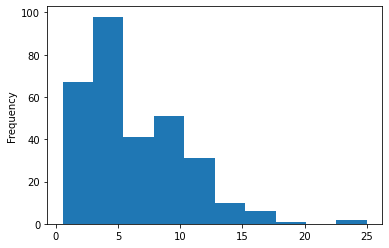

In [29]:
data1=df_[df_.maingroup=="nature"]

display(data1.shape)
#display(data1[data1.distance_<=2].shape)

data2=data1#[data1.distance_<=0.1]
data2=data1[(data1.surroundings=="Ocean/Sea") 
#                 #& (data1.distance_<=0.1)
                 ]
display(data2.head())
display(data2.distance_.plot.hist())





(307, 5)

Distance of Nearest Ocean                      hotel_name_  cheapest_price  review_rating  good_review
0                       1.60               88 Courtyard Hotel        1,657.00           7.50            1
1                      11.00                       ACL Suites        2,452.00           6.00            0
2                       3.20          Achievers Airport Hotel        2,273.00           7.40            0
3                       1.80  Admiral Hotel Manila - MGallery        8,330.00           9.10            1
4                       3.30                Airo Hotel Manila        1,800.00           7.60            1

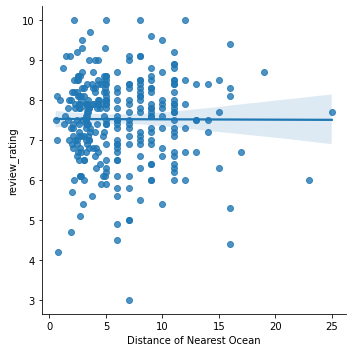

In [30]:
data3=data2.groupby(["hotel_name"])[['distance_']].min()


data3.rename(columns={"distance_": "Distance of Nearest Ocean"},inplace=True)
data4=pd.merge(data3,df1[["hotel_name_",'cheapest_price','review_rating']], left_on="hotel_name",right_on="hotel_name_")
data4["good_review"]=np.where(data4.review_rating>=7.5,1,0)
display(data4.shape)
display(data4.head())
sns.lmplot(data=data4, x="Distance of Nearest Ocean", y="review_rating",
            #hue="good_review"
            )


In [31]:
data5_=data4[["hotel_name_","Distance of Nearest Ocean"]]
data5_.set_index("hotel_name_",inplace=True)
data5_

Distance of Nearest Ocean
hotel_name_                                                        
88 Courtyard Hotel                                             1.60
ACL Suites                                                    11.00
Achievers Airport Hotel                                        3.20
Admiral Hotel Manila - MGallery                                1.80
Airo Hotel Manila                                              3.30
...                                                             ...
airobedz MAKATI - near Cash & Carry Mall                       2.50
airobedz MANILA - near Taft Avenue                             1.90
airobedz MCKINLEY - near SM Aura                               8.00
iHotel Uptown BGC                                              8.00
广东大酒店                                                          1.70

[307 rows x 1 columns]

## Merge

In [32]:
# l=[data1_,
# data2_nt,
# data2_ns,
# data3_na,
# data3_navg,
# data4_,
#   data5_]

In [33]:
# df_to_merge=df2[["hotel_name_","review_rating","city","cheapest_price"]].set_index("hotel_name_")
# df_for_mapping2=pd.concat(l,axis=1)
# df_for_mapping2_=pd.concat([df_for_mapping2,df_to_merge], axis=1)
# df_for_mapping2_
# df_for_mapping2_.dropna(inplace=True)
# df_for_mapping2_.reset_index(inplace=True)
# df_for_mapping2_

In [34]:
#pickle.dump(df_for_mapping2_, open('data/df_hotel_level_fixed_location.pkl', "wb"))
df_for_mapping2_=pickle.load(open("data/df_hotel_level_fixed_location.pkl", "rb"))

In [35]:
df_for_mapping2_

hotel_name_  Count_Walkable Attractions  Nearest_Train  Nearest_Subway  \
0                          88 Courtyard Hotel                        4.00           0.65            0.90   
1                                  ACL Suites                        9.00           0.95            1.50   
2                     Achievers Airport Hotel                        5.00           0.85            1.40   
3             Admiral Hotel Manila - MGallery                       12.00           0.85            3.50   
4                           Airo Hotel Manila                       14.00           0.80            2.80   
..                                        ...                         ...            ...             ...   
299  airobedz MAKATI - near Cash & Carry Mall                       10.00           0.30            3.00   
300        airobedz MANILA - near Taft Avenue                       10.00           0.20            2.80   
301          airobedz MCKINLEY - near SM Aura                       10.00           2.90            6.00   
302                         iHotel Uptown BGC                       10.00           1.30            6.00   
303                                     广东大酒店                        3.00           0.80            1.40   

     Distance To Nearest Airport  Average Distance To Airports  Average Distance of Nearby Resto/Bars  \
0                           3.40                         57.47                                   0.10   
1                          13.00                         61.00                                   0.42   
2                           1.90                         57.97                                   0.14   
3                           7.00                         57.00                                   0.37   
4                           8.00                         56.33                                   0.08   
..                           ...                           ...                                    ...   
299                         6.00                         57.67                                   0.32   
300                         6.00                         57.33                                   0.13   
301                         6.00                         61.67                                   0.52   
302                         7.00                         61.00                                   0.34   
303                         3.60                         57.20                                   0.14   

     Distance of Nearest Ocean  review_rating         city  cheapest_price  
0                         1.60           7.50        Pasay        1,657.00  
1                        11.00           6.00  Quezon City        2,452.00  
2                         3.20           7.40        Pasay        2,273.00  
3                         1.80           9.10       Manila        8,330.00  
4                         3.30           7.60       Manila        1,800.00  
..                         ...            ...          ...             ...  
299                       2.50           8.50       Makati        1,211.00  
300                       1.90           8.00       Manila          963.00  
301                       8.00           8.50       Makati        1,080.00  
302                       8.00           8.10       Makati        1,352.00  
303                       1.70           8.00    Parañaque        4,500.00  

[304 rows x 11 columns]

# Mapping

In [36]:
import json
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'


ncr_cities = json.load(open('data/MetropolitantManila.json', 'r'))
cities_map = {}
for feature in ncr_cities['features']:
    feature['id'] = feature['properties']['ID_2']
    cities_map[feature['properties']['NAME_2'].replace(" City","")] = feature['id']
    
cities_map['Las Piñas'] = cities_map['Las PiÃ±as']
del cities_map['Las PiÃ±as']

cities_map['Parañaque'] = cities_map['ParaÃ±aque']
del cities_map['ParaÃ±aque']

cities_map

{'Kalookan': 950,
 'Makati': 952,
 'Malabon': 953,
 'Mandaluyong': 954,
 'Manila': 955,
 'Marikina': 956,
 'Muntinlupa': 957,
 'Navotas': 958,
 'Pasay': 960,
 'Pasig': 961,
 'Pateros': 962,
 'Quezon': 963,
 'San Juan': 964,
 'Taguig': 965,
 'Valenzuela': 966,
 'Las Piñas': 951,
 'Parañaque': 959}

In [37]:
df_for_mapping2_

hotel_name_  Count_Walkable Attractions  Nearest_Train  Nearest_Subway  \
0                          88 Courtyard Hotel                        4.00           0.65            0.90   
1                                  ACL Suites                        9.00           0.95            1.50   
2                     Achievers Airport Hotel                        5.00           0.85            1.40   
3             Admiral Hotel Manila - MGallery                       12.00           0.85            3.50   
4                           Airo Hotel Manila                       14.00           0.80            2.80   
..                                        ...                         ...            ...             ...   
299  airobedz MAKATI - near Cash & Carry Mall                       10.00           0.30            3.00   
300        airobedz MANILA - near Taft Avenue                       10.00           0.20            2.80   
301          airobedz MCKINLEY - near SM Aura                       10.00           2.90            6.00   
302                         iHotel Uptown BGC                       10.00           1.30            6.00   
303                                     广东大酒店                        3.00           0.80            1.40   

     Distance To Nearest Airport  Average Distance To Airports  Average Distance of Nearby Resto/Bars  \
0                           3.40                         57.47                                   0.10   
1                          13.00                         61.00                                   0.42   
2                           1.90                         57.97                                   0.14   
3                           7.00                         57.00                                   0.37   
4                           8.00                         56.33                                   0.08   
..                           ...                           ...                                    ...   
299                         6.00                         57.67                                   0.32   
300                         6.00                         57.33                                   0.13   
301                         6.00                         61.67                                   0.52   
302                         7.00                         61.00                                   0.34   
303                         3.60                         57.20                                   0.14   

     Distance of Nearest Ocean  review_rating         city  cheapest_price  
0                         1.60           7.50        Pasay        1,657.00  
1                        11.00           6.00  Quezon City        2,452.00  
2                         3.20           7.40        Pasay        2,273.00  
3                         1.80           9.10       Manila        8,330.00  
4                         3.30           7.60       Manila        1,800.00  
..                         ...            ...          ...             ...  
299                       2.50           8.50       Makati        1,211.00  
300                       1.90           8.00       Manila          963.00  
301                       8.00           8.50       Makati        1,080.00  
302                       8.00           8.10       Makati        1,352.00  
303                       1.70           8.00    Parañaque        4,500.00  

[304 rows x 11 columns]

In [38]:
df2=df1.copy()

#----------------------------------------------------------------------------------------------
# df_for_mapping = df2.groupby(['city']).agg(
#     Review_Rating=('review_rating', 'mean'),
#     Price=('cheapest_price', 'mean'),
#     Nearest_Airport=("nearest_airport",'mean'),
#     Nearest_Resto=("nearest_train",'mean'),
#     Nearest_Ocean=("nearest_ocean",'mean'),
#     Nearby_Attractions=("nearest_other_2km",'mean'),
#     Total_Reviews=("hotel_name_",'count'),
# ).reset_index()

# df_for_mapping['Review_Rating']=df_for_mapping['Review_Rating'].round(2)
# df_for_mapping['Price']=df_for_mapping['Price'].round(2)
# df_for_mapping['id'] = df_for_mapping['city'].apply(lambda x: cities_map[x.replace(" City","")])
#----------------------------------------------------------------------------------------------




In [39]:
df_for_mapping = df_for_mapping2_.groupby(['city']).agg(
    Review_Rating=('review_rating', 'mean'),
    Price=('cheapest_price', 'mean'),
    Nearest_Airport=("Distance To Nearest Airport",'mean'),
    Avg_Nearest_Airport=("Average Distance To Airports",'mean'),
    Nearest_Resto_Bar=("Average Distance of Nearby Resto/Bars",'mean'),
    Nearest_Ocean=("Distance of Nearest Ocean",'mean'),
    Nearest_Train=("Nearest_Train",'mean'),
    Nearest_Subway=("Nearest_Subway",'mean'),
    Nearby_Attractions=("Count_Walkable Attractions",'mean'),
    Total_Hotels=("hotel_name_",'count'),
).reset_index()

df_for_mapping['Review_Rating']=df_for_mapping['Review_Rating'].round(2)
df_for_mapping['Price']=df_for_mapping['Price'].round(2)
df_for_mapping['Nearby_Attractions']=df_for_mapping['Nearby_Attractions'].round(2)
df_for_mapping['id'] = df_for_mapping['city'].apply(lambda x: cities_map[x.replace(" City","")])

In [40]:
# pickle.dump(df_for_mapping, open('data/df_for_mapping.pkl', "wb"))
#df_for_mapping=pickle.load(open("data/df_for_mapping.pkl", "rb"))

## Dark Background

In [64]:
colorscale.reverse()

In [72]:
map_column='Review_Rating'


colorscale_ = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]

fig = px.choropleth(df_for_mapping, 
                    locations = 'id', 
                    geojson = ncr_cities, 
                    #color = 'avg_price',
                    color = map_column,
                    hover_name = 'city',
                    color_continuous_scale=colorscale_,

                   hover_data = ['Review_Rating',"Price","Total_Hotels"],
                   )





fig.update_geos(fitbounds = 'locations', visible = False)
cf.update_layout(fig,"Manila Hotels-<br> Mapped by {}".format(map_column),550,900,bgcolor=g.navy_blue,font_color="#E1DAD9",show_ygrid=False,
                    title_font_size=25,title_x=0.4,title_y=0.93)


fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))
fig.update_layout(height=550, margin={"r":0,"t":0,"l":0,"b":0})

fig.update_layout(
    title_font_family="Montserrat",
    title_font_color="#E1DAD9",
)

fig.layout.template = None

# Attribute giving the width and color of border

fig.show()

test


## Light Background

In [41]:
map_column='Review_Rating'

fig = px.choropleth(df_for_mapping, 
                    locations = 'id', 
                    geojson = ncr_cities, 
                    #color = 'avg_price',
                    color = map_column,
                    hover_name = 'city',
                    color_continuous_scale=px.colors.sequential.Blues,
                   hover_data = ['Review_Rating',"Price","Total_Hotels"],
                   )





fig.update_geos(fitbounds = 'locations', visible = False)
# cf.update_layout(fig,"Manila Hotels-<br> Mapped by {}".format(map_column),550,900,bgcolor="white",font_color="black",show_ygrid=False,
#                     title_font_size=25,title_x=0.5,title_y=0.93)

#E1DAD9, 
#FAFAF9
# cf.update_layout(fig,"Manila Hotels-<br> Mapped by {}".format(map_column),550,900,bgcolor=g.navy_blue,font_color="#E1DAD9",show_ygrid=False,
#                     title_font_size=25,title_x=0.4,title_y=0.93)

#FAFAF9-light grey
#Light Grey- #E1DAD9

#BG-#d7d7cf dark grey
#BG-#eeeeeb light grey
cf.update_layout(fig,"Manila Hotels-<br>by {}".format(map_column),550,900,bgcolor="#eeeeeb",font_color="black",show_ygrid=False,
                    title_font_size=30,title_x=0.4,title_y=0.93)

fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))
fig.update_layout(height=550, margin={"r":0,"t":0,"l":0,"b":0})

fig.update_layout(
    title_font_family="Montserrat",
    title_font_color="black",
)

fig.show()

test


In [42]:
map_column='Nearby_Attractions'

fig = px.choropleth(df_for_mapping, 
                    locations = 'id', 
                    geojson = ncr_cities, 
                    #color = 'avg_price',
                    color = map_column,
                    hover_name = 'city',
                    color_continuous_scale=px.colors.sequential.Blues,
                   hover_data = ['Review_Rating',"Price","Total_Hotels"],
                   )





fig.update_geos(fitbounds = 'locations', visible = False)
# cf.update_layout(fig,"Manila Hotels-<br> Mapped by {}".format(map_column),550,900,bgcolor="white",font_color="black",show_ygrid=False,
#                     title_font_size=25,title_x=0.5,title_y=0.93)

#E1DAD9, 
#FAFAF9
# cf.update_layout(fig,"Manila Hotels-<br> Mapped by {}".format(map_column),550,900,bgcolor=g.navy_blue,font_color="#E1DAD9",show_ygrid=False,
#                     title_font_size=25,title_x=0.4,title_y=0.93)

#FAFAF9-light grey
#Light Grey- #E1DAD9

#BG-#d7d7cf dark grey
#BG-#eeeeeb light grey
cf.update_layout(fig,"Manila Hotels-<br>by {}".format(map_column),550,900,bgcolor="#eeeeeb",font_color="black",show_ygrid=False,
                    title_font_size=25,title_x=0.375,title_y=0.93)

fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))

# fig.update_layout(paper_bgcolor="#2D3B6A",
#                                   plot_bgcolor="white",)
fig.update_layout(height=550, margin={"r":0,"t":0,"l":0,"b":0})
#fig.layout.font.family = 'Calibri'
fig.show()

test


In [43]:
map_column='Nearest_Resto_Bar'

fig = px.choropleth(df_for_mapping, 
                    locations = 'id', 
                    geojson = ncr_cities, 
                    #color = 'avg_price',
                    color = map_column,
                    hover_name = 'city',
                    color_continuous_scale=px.colors.sequential.Blues,
                   hover_data = ['Review_Rating',"Price","Total_Hotels"],
                   )





fig.update_geos(fitbounds = 'locations', visible = False)
# cf.update_layout(fig,"Manila Hotels-<br> Mapped by {}".format(map_column),550,900,bgcolor="white",font_color="black",show_ygrid=False,
#                     title_font_size=25,title_x=0.5,title_y=0.93)

#E1DAD9, 
#FAFAF9
# cf.update_layout(fig,"Manila Hotels-<br> Mapped by {}".format(map_column),550,900,bgcolor=g.navy_blue,font_color="#E1DAD9",show_ygrid=False,
#                     title_font_size=25,title_x=0.4,title_y=0.93)

#FAFAF9-light grey
#Light Grey- #E1DAD9

#BG-#d7d7cf dark grey
#BG-#eeeeeb light grey
cf.update_layout(fig,"Manila Hotels-<br>by {}".format(map_column),550,900,bgcolor="#eeeeeb",font_color="black",show_ygrid=False,
                    title_font_size=25,title_x=0.375,title_y=0.93)

fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))

# fig.update_layout(paper_bgcolor="#2D3B6A",
#                                   plot_bgcolor="white",)
fig.update_layout(height=550, margin={"r":0,"t":0,"l":0,"b":0})
#fig.layout.font.family = 'Calibri'
fig.show()

test


In [44]:
fig = px.colors.diverging.swatches_continuous()
fig.show()

In [45]:
map_column='Price'

fig = px.choropleth(df_for_mapping, 
                    locations = 'id', 
                    geojson = ncr_cities, 
                    #color = 'avg_price',
                    color = 'Price',
                    hover_name = 'city',
                    color_continuous_scale=px.colors.sequential.Blues,
                   hover_data = ['Review_Rating',"Price","Total_Hotels"],
                   )





fig.update_geos(fitbounds = 'locations', visible = False)
# cf.update_layout(fig,"Manila Hotels-<br> Mapped by {}".format(map_column),550,900,bgcolor="#2D3B6A",font_color="white",show_ygrid=False,
#                     title_font_size=25,title_x=0.5,title_y=0.93)

cf.update_layout(fig,"Manila Hotels-<br> Mapped by {}".format(map_column),550,900,bgcolor="#FAFAF9",font_color="black",show_ygrid=False,
                    title_font_size=25,title_x=0.5,title_y=0.93)


fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))

# fig.update_layout(paper_bgcolor="#2D3B6A",
#                                   plot_bgcolor="white",)
fig.update_layout(height=550, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

test


In [46]:
fig = px.choropleth(df_for_mapping, 
                    locations = 'id', 
                    geojson = ncr_cities, 
                    #color = 'avg_price',
                    color = 'Review_Rating',
                    hover_name = 'city',
                    color_continuous_scale=px.colors.sequential.Greys,
                   hover_data = ['Review_Rating',"Price","Total_Hotels"])




fig.update_geos(fitbounds = 'locations', visible = False)
cf.layout_v1(fig,"Manila Hotel Mapping", 500,800,["",""],
            #bgcolor="#3D607D"
            )
fig.update_layout(geo=dict(bgcolor= 'white'))
fig.update_traces(marker=dict(line=dict(color="black", width=1)))


fig.show()

In [47]:
fig = px.choropleth(df_for_mapping, 
                    locations = 'id', 
                    geojson = ncr_cities, 
                    #color = 'avg_price',
                    color = 'Nearby_Attractions',
                    hover_name = 'city',
                    color_continuous_scale=px.colors.sequential.Greys,
                   hover_data = ['Review_Rating',"Price","Total_Hotels"])




fig.update_geos(fitbounds = 'locations', visible = False)
cf.layout_v1(fig,"Manila Hotel Mapping", 500,800,["",""],
            #bgcolor="#3D607D"
            )
fig.update_layout(geo=dict(bgcolor= 'white'))
fig.update_traces(marker=dict(line=dict(color="black", width=1)))


fig.show()

In [48]:
fig = px.choropleth(df_for_mapping, 
                    locations = 'id', 
                    geojson = ncr_cities, 
                    #color = 'avg_price',
                    color = 'Nearest_Subway',
                    hover_name = 'city',
                    color_continuous_scale=px.colors.sequential.Greys,
                   hover_data = ['Review_Rating',"Price","Total_Hotels"])




fig.update_geos(fitbounds = 'locations', visible = False)
cf.layout_v1(fig,"Manila Hotel Mapping", 500,800,["",""],
            #bgcolor="#3D607D"
            )
fig.update_layout(geo=dict(bgcolor= 'white'))
fig.update_traces(marker=dict(line=dict(color="black", width=1)))


fig.show()

In [49]:
df_for_mapping

city  Review_Rating    Price  Nearest_Airport  Avg_Nearest_Airport  Nearest_Resto_Bar  Nearest_Ocean  \
0     Las Piñas           6.93 1,728.33             7.83                62.61               0.58          11.17   
1        Makati           7.78 2,196.59             5.56                59.04               0.15           4.59   
2   Mandaluyong           7.50 1,239.00             8.67                59.89               0.17           7.44   
3        Manila           7.23 1,986.26             8.86                56.84               0.16           4.35   
4      Marikina           7.60   994.00            13.00                57.00               0.07           9.00   
5    Muntinlupa           7.41 2,240.71            10.86                63.05               0.19          15.43   
6       Navotas           6.98 1,378.50            21.75                59.58               0.50          18.25   
7     Parañaque           7.61 2,742.19             3.38                59.38               0.36           5.44   
8         Pasay           7.39 3,741.61             2.78                57.85               0.23           2.72   
9         Pasig           8.07 2,486.38             9.12                61.29               0.08           8.75   
10  Quezon City           7.71 1,408.88            13.81                59.87               0.23          11.11   
11       Taguig           7.58 4,201.00             5.83                61.22               0.30           7.17   

    Nearest_Train  Nearest_Subway  Nearby_Attractions  Total_Hotels   id  
0            2.29           10.00                5.67             6  951  
1            1.01            3.72               10.11            79  952  
2            1.06            3.29                9.56             9  954  
3            0.54            2.23               11.65            78  955  
4            0.75            2.50                9.00             1  956  
5            1.32           13.86                9.14             7  957  
6            5.89            9.55                6.00             4  958  
7            1.19            3.96                4.65            26  959  
8            0.81            1.59                5.65            31  960  
9            0.95            4.95                9.62             8  961  
10           1.22            2.08                6.14            43  963  
11           2.30            5.47                7.17            12  965

In [50]:
fig = px.choropleth(df_for_mapping, 
                    locations = 'id', 
                    geojson = ncr_cities, 
                    #color = 'avg_price',
                    color = 'Nearest_Train',
                    hover_name = 'city',
                    color_continuous_scale=px.colors.sequential.Greys,
                   hover_data = ['Review_Rating',"Price","Total_Hotels"])




fig.update_geos(fitbounds = 'locations', visible = False)
cf.layout_v1(fig,"Manila Hotel Mapping", 500,800,["",""],
            #bgcolor="#3D607D"
            )
fig.update_layout(geo=dict(bgcolor= 'white'))
fig.update_traces(marker=dict(line=dict(color="black", width=1)))


fig.show()

## Mapping+ Clustering

In [51]:
df_clusters = pickle.load(open("../clustering/data/merged_hotel_data_with_facilities&cluster.pkl", "rb"))
df_clusters.cluster_label.value_counts(normalize=True)

Low-Budget Solo      0.50
Low-Budget Couple    0.29
Mid-Budget Couple    0.10
Mid-Budget Family    0.08
High-Budget Family   0.03
Name: cluster_label, dtype: float64

In [52]:

df_clusters_person_level=pd.merge(df_clusters[["cluster_label","hotel_name_"]],df_for_mapping2_, how="left",on="hotel_name_")

spec_cluster="High-Budget Family"
df_clusters_person_level=df_clusters_person_level[df_clusters_person_level.cluster_label==spec_cluster]


df_for_mapping_clustered=df_clusters_person_level.groupby(["cluster_label","city"]).agg(
    Review_Rating=('review_rating', 'mean'),
    Price=('cheapest_price', 'mean'),
    Nearest_Airport=("Distance To Nearest Airport",'mean'),
    Avg_Nearest_Airport=("Average Distance To Airports",'mean'),
    Nearest_Resto_Bar=("Average Distance of Nearby Resto/Bars",'mean'),
    Nearest_Ocean=("Distance of Nearest Ocean",'mean'),
    Nearest_Train=("Nearest_Train",'mean'),
    Nearest_Subway=("Nearest_Subway",'mean'),
    Nearby_Attractions=("Count_Walkable Attractions",'mean'),
    Total_Hotels=("hotel_name_",'count'),
).reset_index()


df_for_mapping_clustered['Review_Rating']=df_for_mapping_clustered['Review_Rating'].round(2)
df_for_mapping_clustered['Price']=df_for_mapping_clustered['Price'].round(2)
df_for_mapping_clustered['Nearby_Attractions']=df_for_mapping_clustered['Nearby_Attractions'].round(2)
df_for_mapping_clustered['id'] = df_for_mapping_clustered['city'].apply(lambda x: cities_map[x.replace(" City","")])

print("")
display(df_for_mapping_clustered.shape)
df_for_mapping_clustered

(6, 13)

cluster_label       city  Review_Rating     Price  Nearest_Airport  Avg_Nearest_Airport  Nearest_Resto_Bar  \
0  High-Budget Family     Makati           8.85  9,653.85             4.66                58.76               0.08   
1  High-Budget Family     Manila           8.51  9,214.51             7.47                56.77               0.12   
2  High-Budget Family  Parañaque           8.70 12,335.60             2.50                57.50               0.27   
3  High-Budget Family      Pasay           8.40  8,523.76             1.60                58.50               0.12   
4  High-Budget Family      Pasig           8.80  6,059.00            10.00                61.33               0.05   
5  High-Budget Family     Taguig           9.07 15,110.99             6.27                60.76               0.11   

   Nearest_Ocean  Nearest_Train  Nearest_Subway  Nearby_Attractions  Total_Hotels   id  
0           4.07           0.68            2.91               10.00           871  952  
1           3.00           0.69            3.13               11.76           150  955  
2           2.90           0.50            1.70                1.00            10  959  
3           4.29           1.11            2.62                7.53           582  960  
4           9.00           0.75            4.10               10.00             3  961  
5           7.00           1.33            5.27               10.00           182  965

In [53]:

map_column='Review_Rating'
spec_cluster="Low-Budget Solo"
fig = px.choropleth(df_for_mapping_clustered, 
                    locations = 'id', 
                    geojson = ncr_cities, 
                    #color = 'avg_price',
                    color = map_column,
                    hover_name = 'city',
                    color_continuous_scale=px.colors.sequential.Blues,
                   hover_data = ['Review_Rating',"Price","Total_Hotels","cluster_label"])




fig.update_geos(fitbounds = 'locations', visible = False)
# cf.layout_v1(fig,"Manila Hotel Mapping-<br>"+spec_cluster, 500,800,["",""],
#             #bgcolor="#3D607D"
#             )
# fig.update_layout(geo=dict(bgcolor= 'white'))
# fig.update_traces(marker=dict(line=dict(color="black", width=1)))

cf.update_layout(fig,"Review Ratings by Cluster-<br>{}".format(spec_cluster),550,900,bgcolor="#eeeeeb",font_color="black",show_ygrid=False,
                    title_font_size=25,title_x=0.4,title_y=0.93)

fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))
fig.update_layout(height=550, margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

test


In [54]:

map_column='Review_Rating'
spec_cluster="High-Budget Family"
fig = px.choropleth(df_for_mapping_clustered, 
                    locations = 'id', 
                    geojson = ncr_cities, 
                    #color = 'avg_price',
                    color = map_column,
                    hover_name = 'city',
                    color_continuous_scale=px.colors.sequential.Blues,
                   hover_data = ['Review_Rating',"Price","Total_Hotels","cluster_label"])




fig.update_geos(fitbounds = 'locations', visible = False)
# cf.layout_v1(fig,"Manila Hotel Mapping-<br>"+spec_cluster, 500,800,["",""],
#             #bgcolor="#3D607D"
#             )
# fig.update_layout(geo=dict(bgcolor= 'white'))
# fig.update_traces(marker=dict(line=dict(color="black", width=1)))

cf.update_layout(fig,"Review Ratings by Cluster-<br>{}".format(spec_cluster),550,900,bgcolor="#eeeeeb",font_color="black",show_ygrid=False,
                    title_font_size=25,title_x=0.4,title_y=0.93)

fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))
fig.update_layout(height=550, margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

test


In [56]:
fig = px.choropleth(df_for_mapping_clustered, 
                    locations = 'id', 
                    geojson = ncr_cities, 
                    #color = 'avg_price',
                    color = 'Total_Hotels',
                    hover_name = 'city',
                    color_continuous_scale=px.colors.sequential.Greys,
                   hover_data = ['Review_Rating',"Price","Total_Hotels"])




fig.update_geos(fitbounds = 'locations', visible = False)
cf.layout_v1(fig,"Manila Hotel Mapping", 500,800,["",""],
            #bgcolor="#3D607D"
            )
fig.update_layout(geo=dict(bgcolor= 'white'))
fig.update_traces(marker=dict(line=dict(color="black", width=1)))


fig.show()